<a href="https://colab.research.google.com/github/tgwon/ai4ml/blob/main/project/EDA_Preprocessing_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [22]:
# drive mount
# 라이브러리 설치 및 seed 설정.

from google.colab import drive
drive.mount('/content/drive')

import os
import random
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

from scipy.stats import f_oneway

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 경고 무시 설정
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## RMSLE (Root Mean Squared Log Error) -> 과대추정보다는 과소추정을 조심하자

In [6]:
y_true = [60, 80, 90]
y_pred = [67, 78, 91]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 4.242640687119285
RMSLE : 0.0646679237996832


In [7]:
# RMSLE 는 RMSE에 비해 이상치에 강건함.

y_true = [60, 80, 800]
y_pred = [67, 78, 91]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 409.3629196690878
RMSLE : 1.2510842762984995


In [8]:
y_true = [100]
y_pred = [60]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 40.0
RMSLE : 0.5042466526679483


In [9]:
# RMSLE 는 Under Estimation에 더 큰 패널티를 부여함.

y_true = [100]
y_pred = [140]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 40.0
RMSLE : 0.33363937353690876


## data 확인

In [10]:
train_df = pd.read_csv('drive/MyDrive/ai4ml/open/train.csv')
test_df = pd.read_csv('drive/MyDrive/ai4ml/open/test.csv')

In [11]:
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [13]:
train_df.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [14]:
train_df.nunique()

ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

In [15]:
test_df.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

## ECLO
- 3시그마(약 14.3) 보다 큰 값을 이상치라고 생각하고 피해 규모가 큰 대형 사고들을 outlier라는 컬럼으로 표시
- 사망자가 발생한 사고는 약 300개 밖에 없음. 그 중 대형 사고는 60개

In [19]:
train_df.ECLO.describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

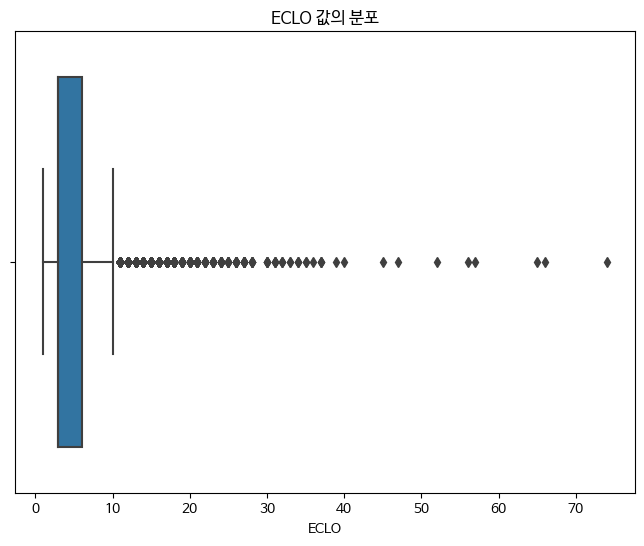

In [21]:
# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['ECLO'])
plt.title('ECLO 값의 분포')
plt.show()

In [23]:
# ECLO 값의 평균과 표준 편차 계산
mean_eclo = train_df['ECLO'].mean()
std_eclo = train_df['ECLO'].std()

# 3시그마 범위 정의
lower_bound = mean_eclo - 3 * std_eclo
upper_bound = mean_eclo + 3 * std_eclo

# outlier 컬럼 생성
train_df['outlier'] = (train_df['ECLO'] < lower_bound) | (train_df['ECLO'] > upper_bound)

In [24]:
upper_bound

14.348320716820155

In [25]:
train_df.outlier.sum()

780

In [26]:
len(train_df[train_df.사망자수 > 0])

300

In [27]:
train_df[train_df.사망자수 > 0].outlier.sum()

60

## 시군구
- test data 에 존재하지 않는 시군구 데이터 삭제 (28개)
- 시군구 별 평균 ECLO를 봤을 때 눈에 띄게 평균 ECLO 가 높거나 낮은 시군구들 발견
    - 과소추정에 더 민감해야하기 때문에 높은 시군구들에 주목
    - 직접 확인 해보니, 대형사고가 발생 + 적은 데이터 때문이었음
- 시군구 별 사고 발생 횟수 확인
    - 시군구 별 평균 ECLO와 음의 상관관계 ( -0.165 )
- 변수생성
    - 시군구별평균ECLO
    - 시군구별사고발생횟수



In [28]:
train_df.시군구.value_counts()

시군구
대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: count, Length: 199, dtype: int64

In [29]:
# 시군구의 빈도 계산
count_by_sigungu = train_df['시군구'].value_counts()

# 빈도가 30 이상인 시군구 선택
selected_sigungu = count_by_sigungu[count_by_sigungu >= 30].index

# 선택된 시군구에 해당하는 데이터 추출
selected_data = train_df[train_df['시군구'].isin(selected_sigungu)]

In [30]:
groups = [selected_data['ECLO'][selected_data['시군구'] == group] for group in selected_data['시군구'].unique()]

# ANOVA 검정
f_statistic, p_value = f_oneway(*groups)

# 결과 출력
print(f'ANOVA 검정 통계량: {f_statistic}')
print(f'p-value: {p_value}')

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print('시군구에 따라 ECLO 값이 유의미하게 차이납니다.')
else:
    print('시군구에 따라 ECLO 값에는 유의미한 차이가 없습니다.')

ANOVA 검정 통계량: 3.2313806207660902
p-value: 7.5323720103188455e-34
시군구에 따라 ECLO 값이 유의미하게 차이납니다.


In [31]:
groups = [train_df['ECLO'][train_df['시군구'] == group] for group in train_df['시군구'].unique()]

# ANOVA 검정
f_statistic, p_value = f_oneway(*groups)

# 결과 출력
print(f'ANOVA 검정 통계량: {f_statistic}')
print(f'p-value: {p_value}')

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print('시군구에 따라 ECLO 값이 유의미하게 차이납니다.')
else:
    print('시군구에 따라 ECLO 값에는 유의미한 차이가 없습니다.')

ANOVA 검정 통계량: 3.219823035824224
p-value: 4.157622250234453e-47
시군구에 따라 ECLO 값이 유의미하게 차이납니다.


In [32]:
train_df.shape

(39609, 24)

In [33]:
# train_df에서 test_df에 존재하지 않는 시군구 값 제거
train_df = train_df[train_df['시군구'].isin(test_df['시군구'])]

In [34]:
train_df.shape

(39581, 24)

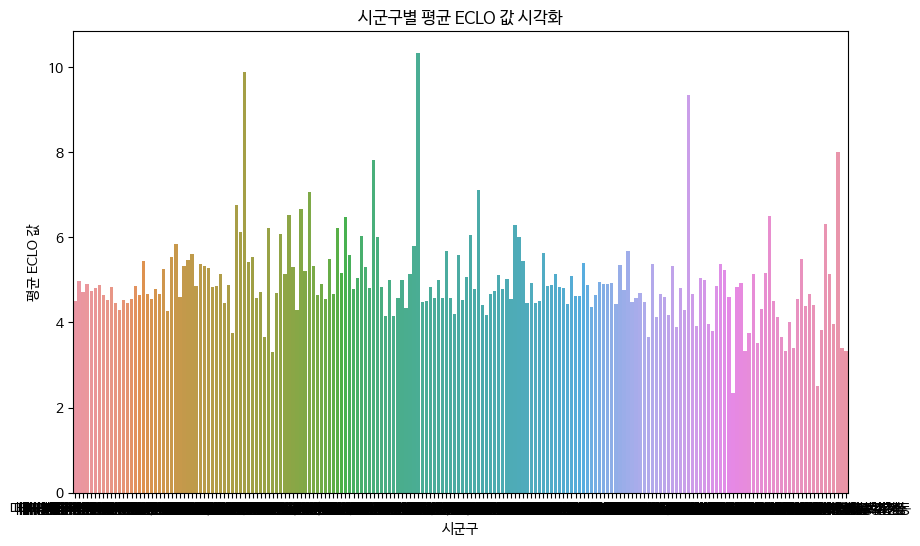

In [35]:
# 중복된 시군구 값들을 평균내어 새로운 데이터프레임 생성
df_avg = train_df.groupby('시군구')['ECLO'].mean().reset_index()

# 시군구별 ECLO 값을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='시군구', y='ECLO', data=df_avg)
plt.title('시군구별 평균 ECLO 값 시각화')
plt.xlabel('시군구')
plt.ylabel('평균 ECLO 값')
plt.show()

In [36]:
# 'ECLO' 열의 평균과 표준편차 계산
mean_value = df_avg['ECLO'].mean()
std_dev = df_avg['ECLO'].std()

# 3시그마 밖의 값을 찾기
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev

outliers = df_avg[(df_avg['ECLO'] < lower_bound) | (df_avg['ECLO'] > upper_bound)]

# 결과 출력
print("3시그마 밖의 값:")
print(outliers)

3시그마 밖의 값:
              시군구       ECLO
42   대구광역시 동구 덕곡동   9.875000
85   대구광역시 북구 노곡동  10.333333
152  대구광역시 중구 대안동   9.333333
189  대구광역시 중구 하서동   8.000000


In [37]:
train_df.ECLO.describe()

count    39581.000000
mean         4.725803
std          3.206176
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

In [38]:
train_df[train_df.시군구 == '대구광역시 동구 덕곡동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,outlier
3140,ACCIDENT_03140,2019-03-30 09,토요일,맑음,대구광역시 동구 덕곡동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,승용,남,41세,경상,0,0,3,0,9,False
3739,ACCIDENT_03739,2019-04-15 01,월요일,맑음,대구광역시 동구 덕곡동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,...,NaN,NaN,NaN,NaN,2,0,0,0,20,True
4902,ACCIDENT_04902,2019-05-12 12,일요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,승용,남,46세,경상,0,0,3,0,9,False
5138,ACCIDENT_05138,2019-05-18 16,토요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,승합,남,57세,경상,0,0,4,0,12,False
17905,ACCIDENT_17905,2020-04-19 19,일요일,비,대구광역시 동구 덕곡동,단일로 - 기타,젖음/습기,차대차,추돌,안전운전불이행,...,승용,여,39세,경상,0,2,2,0,16,True
22010,ACCIDENT_22010,2020-08-08 17,토요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,차로위반,...,승용,남,31세,경상,0,0,1,1,4,False
32068,ACCIDENT_32068,2021-05-19 11,수요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,승용,남,30세,경상,0,0,2,0,6,False
32199,ACCIDENT_32199,2021-05-23 18,일요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,원동기,남,34세,경상,0,0,1,0,3,False


In [39]:
train_df[train_df.시군구 == '대구광역시 북구 노곡동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,outlier
2611,ACCIDENT_02611,2019-03-17 13,일요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,승용,여,36세,경상,0,0,1,0,3,False
3365,ACCIDENT_03365,2019-04-05 13,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,기타,안전거리미확보,...,승용,남,58세,경상,0,0,4,0,12,False
4522,ACCIDENT_04522,2019-05-03 07,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전거리미확보,...,승용,남,57세,경상,0,0,1,0,3,False
4975,ACCIDENT_04975,2019-05-14 15,화요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,승용,남,71세,중상,0,5,2,0,31,True
8281,ACCIDENT_08281,2019-08-05 17,월요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,보행자,여,20세,경상,0,0,1,0,3,False
9799,ACCIDENT_09799,2019-09-13 08,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전거리미확보,...,승용,남,48세,경상,0,0,2,0,6,False
10040,ACCIDENT_10040,2019-09-19 14,목요일,맑음,대구광역시 북구 노곡동,교차로 - 교차로횡단보도내,건조,차대차,측면충돌,안전운전불이행,...,승용,남,53세,상해없음,0,1,0,0,5,False
13208,ACCIDENT_13208,2019-11-29 18,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,화물,남,67세,경상,0,0,3,0,9,False
14202,ACCIDENT_14202,2019-12-23 20,월요일,맑음,대구광역시 북구 노곡동,단일로 - 교량,건조,차대차,추돌,안전운전불이행,...,화물,남,31세,경상,1,0,1,0,13,False
17791,ACCIDENT_17791,2020-04-15 15,수요일,맑음,대구광역시 북구 노곡동,교차로 - 교차로안,건조,차대차,측면충돌,기타,...,승용,남,38세,경상,0,0,2,0,6,False


In [40]:
train_df[train_df.시군구 =='대구광역시 중구 대안동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,outlier
15381,ACCIDENT_15381,2020-01-23 17,목요일,맑음,대구광역시 중구 대안동,교차로 - 교차로안,건조,차대차,측면충돌,안전운전불이행,...,승용,남,24세,경상,0,0,3,0,9,False
23791,ACCIDENT_23791,2020-09-23 17,수요일,맑음,대구광역시 중구 대안동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,승용,남,39세,경상,0,0,2,0,6,False
33549,ACCIDENT_33549,2021-07-02 18,금요일,맑음,대구광역시 중구 대안동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,승용,남,35세,경상,0,0,4,1,13,False


In [41]:
train_df[train_df.시군구 =='대구광역시 중구 하서동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,outlier
8589,ACCIDENT_08589,2019-08-13 12,화요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,이륜,남,16세,부상신고,0,0,0,2,2,False
9744,ACCIDENT_09744,2019-09-11 18,수요일,맑음,대구광역시 중구 하서동,교차로 - 교차로부근,건조,차대차,측면충돌,안전운전불이행,...,승용,남,49세,경상,0,2,7,6,37,True
15708,ACCIDENT_15708,2020-02-03 11,월요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,승용,여,23세,경상,0,0,1,1,4,False
18756,ACCIDENT_18756,2020-05-14 08,목요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,승용,여,49세,상해없음,0,0,0,1,1,False
21048,ACCIDENT_21048,2020-07-13 04,월요일,맑음,대구광역시 중구 하서동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,승용,남,66세,경상,0,0,1,0,3,False
21412,ACCIDENT_21412,2020-07-23 00,목요일,비,대구광역시 중구 하서동,교차로 - 교차로부근,젖음/습기,차대차,측면충돌,신호위반,...,승용,남,23세,부상신고,0,0,4,2,14,False
21510,ACCIDENT_21510,2020-07-25 01,토요일,비,대구광역시 중구 하서동,교차로 - 교차로부근,젖음/습기,차대차,정면충돌,중앙선침범,...,승용,남,29세,중상,0,1,1,1,9,False
23077,ACCIDENT_23077,2020-09-06 00,일요일,맑음,대구광역시 중구 하서동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,이륜,남,21세,경상,0,0,1,0,3,False
23191,ACCIDENT_23191,2020-09-08 22,화요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,승용,여,20세,경상,0,0,2,0,6,False
37437,ACCIDENT_37437,2021-10-29 13,금요일,맑음,대구광역시 중구 하서동,교차로 - 교차로횡단보도내,건조,차대차,기타,안전운전불이행,...,자전거,남,66세,부상신고,0,0,0,1,1,False


In [42]:
train_df[train_df.시군구 =='대구광역시 동구 진인동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,outlier
2615,ACCIDENT_02615,2019-03-17 14,일요일,맑음,대구광역시 동구 진인동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,승용,여,58세,경상,0,0,3,0,9,False
4417,ACCIDENT_04417,2019-04-30 09,화요일,맑음,대구광역시 동구 진인동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,승용,남,70세,중상,0,1,0,1,6,False
5920,ACCIDENT_05920,2019-06-05 15,수요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,정면충돌,안전운전불이행,...,화물,남,30세,경상,0,0,2,0,6,False
6628,ACCIDENT_06628,2019-06-22 15,토요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,승용,여,25세,중상,0,4,2,0,26,True
7566,ACCIDENT_07566,2019-07-17 12,수요일,맑음,대구광역시 동구 진인동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,...,NaN,NaN,NaN,NaN,0,0,0,1,1,False
8273,ACCIDENT_08273,2019-08-05 16,월요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,정면충돌,중앙선침범,...,승용,여,54세,중상,2,2,0,0,30,True
9015,ACCIDENT_09015,2019-08-24 12,토요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,NaN,NaN,NaN,NaN,0,0,1,0,3,False
13366,ACCIDENT_13366,2019-12-03 13,화요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,후진중충돌,중앙선침범,...,승용,남,63세,중상,0,2,0,0,10,False
18216,ACCIDENT_18216,2020-04-28 21,화요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차량단독,전도전복 - 전도,안전운전불이행,...,NaN,NaN,NaN,NaN,0,0,0,1,1,False
18397,ACCIDENT_18397,2020-05-04 11,월요일,맑음,대구광역시 동구 진인동,교차로 - 교차로부근,건조,차대차,추돌,안전거리미확보,...,승합,남,61세,경상,0,0,1,1,4,False


In [43]:
df_avg

,시군구,ECLO
0,대구광역시 남구 대명동,4.492281
1,대구광역시 남구 봉덕동,4.968000
2,대구광역시 남구 이천동,4.702703
3,대구광역시 달서구 갈산동,4.909091
4,대구광역시 달서구 감삼동,4.738938
...,...,...
187,대구광역시 중구 태평로3가,5.125000
188,대구광역시 중구 포정동,3.961538
189,대구광역시 중구 하서동,8.000000
190,대구광역시 중구 향촌동,3.400000


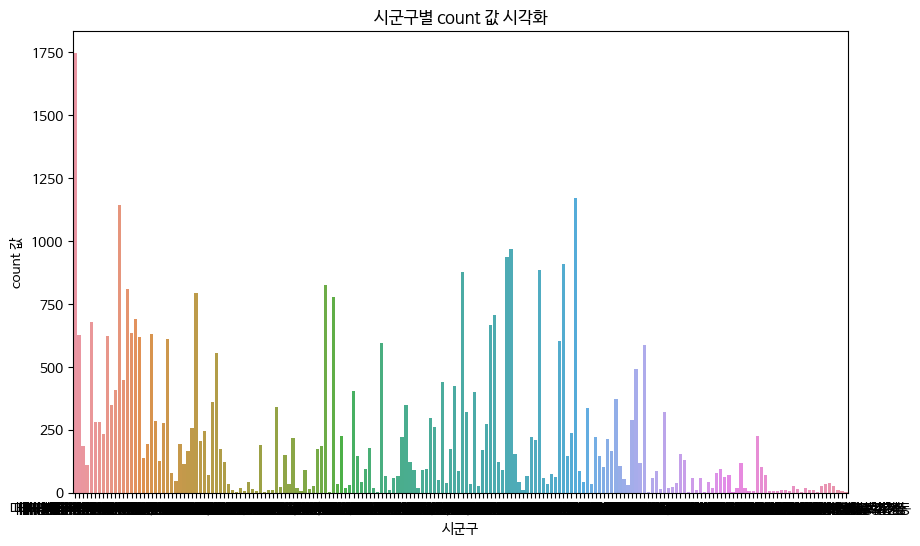

In [44]:
df_avg = train_df.groupby('시군구')['ID'].count().reset_index()

# 시군구별 사고 count 값을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='시군구', y='ID', data=df_avg)
plt.title('시군구별 count 값 시각화')
plt.xlabel('시군구')
plt.ylabel('count 값')
plt.show()

In [45]:
df_avg.describe()

,ID
count,192.000000
mean,206.151042
std,274.534376
min,1.000000
25%,24.500000
50%,93.000000
75%,263.000000
max,1749.000000


In [46]:
df_avg[df_avg.ID > 1000]

,시군구,ID
0,대구광역시 남구 대명동,1749
11,대구광역시 달서구 상인동,1143
124,대구광역시 수성구 범어동,1173


In [47]:
df1 = train_df.groupby('시군구')['ECLO'].mean().reset_index()
df2 = train_df.groupby('시군구')['ID'].count().reset_index()

# '시군구' 컬럼을 기준으로 데이터프레임 병합
merged_df = pd.merge(df1, df2, on='시군구', how='inner')

In [48]:
# 컬럼명을 '시군구별평균ECLO'로 변경
merged_df = merged_df.rename(columns={'ECLO': '시군구별평균ECLO', 'ID' : '시군구별사고발생횟수'})

In [49]:
merged_df

,시군구,시군구별평균ECLO,시군구별사고발생횟수
0,대구광역시 남구 대명동,4.492281,1749
1,대구광역시 남구 봉덕동,4.968000,625
2,대구광역시 남구 이천동,4.702703,185
3,대구광역시 달서구 갈산동,4.909091,110
4,대구광역시 달서구 감삼동,4.738938,678
...,...,...,...
187,대구광역시 중구 태평로3가,5.125000,40
188,대구광역시 중구 포정동,3.961538,26
189,대구광역시 중구 하서동,8.000000,10
190,대구광역시 중구 향촌동,3.400000,5


In [50]:
# 두 변수(ECLO와 ID) 간의 상관관계 파악
correlation_matrix = merged_df[['시군구별평균ECLO', '시군구별사고발생횟수']].corr()

# 상관계수 출력
print(correlation_matrix)

            시군구별평균ECLO  시군구별사고발생횟수
시군구별평균ECLO    1.000000   -0.165565
시군구별사고발생횟수   -0.165565    1.000000


In [51]:
train_df.shape

(39581, 24)

In [52]:
# 시군구를 기준으로 train_df와 merged_df를 병합
train_df = pd.merge(train_df, merged_df, on='시군구', how='left')
test_df = pd.merge(test_df, merged_df, on='시군구', how='left')

In [53]:
train_df.shape

(39581, 26)

In [54]:
# 도시, 구, 동 분류
# \S+ : 하나 이상의 공백이 아닌 문자
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_df['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_df['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

In [55]:
train_df.columns

Index(['ID', '사고일시', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',
       'ECLO', 'outlier', '시군구별평균ECLO', '시군구별사고발생횟수', '도시', '구', '동'],
      dtype='object')

## 기상상태
- 기상상태에 따라 평균 ECLO는 차이가 있는 것처럼 보임. "안개" 일 때 높음
- train_df에는 6가지 기상상태가 다 있지만, test에는 "안개" 기상상태가 존재하지 않음. -> 삭제함
- 흐림, 기타, 눈 -> 합쳐서 그냥 기타로 했음. 데이터 수가 너무 적어서

In [56]:
train_df.기상상태.unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

In [57]:
test_df.기상상태.unique()

array(['맑음', '흐림', '기타', '비', '눈'], dtype=object)

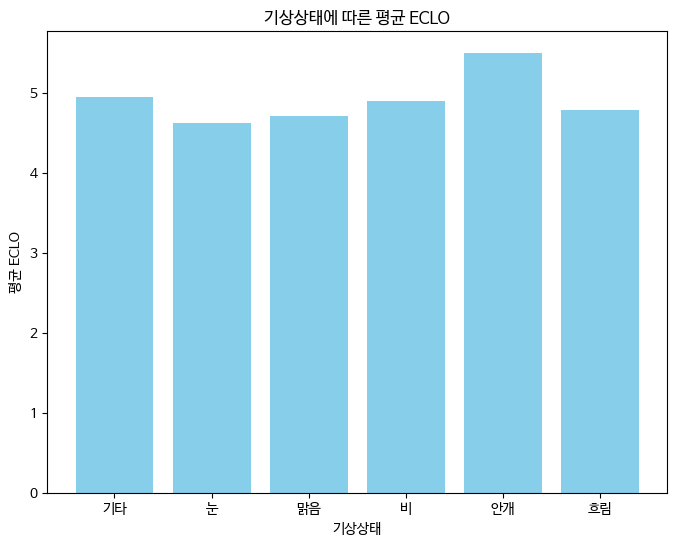

In [58]:
# 기상상태별 ECLO의 평균 계산
mean_eclo_by_weather = train_df.groupby('기상상태')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['기상상태'], mean_eclo_by_weather['ECLO'], color='skyblue')
plt.title('기상상태에 따른 평균 ECLO')
plt.xlabel('기상상태')
plt.ylabel('평균 ECLO')
plt.show()

In [59]:
train_df.기상상태.value_counts()

기상상태
맑음    36154
비      2626
흐림      729
기타       56
안개        8
눈         8
Name: count, dtype: int64

In [60]:
test_df.기상상태.value_counts()

기상상태
맑음    10321
비       394
흐림      207
기타       31
눈        10
Name: count, dtype: int64

In [61]:
# train_df에서 test_df에 존재하지 않는 기상상태 값 제거
train_df = train_df[train_df['기상상태'].isin(test_df['기상상태'])]

In [62]:
train_df.기상상태.value_counts()

기상상태
맑음    36154
비      2626
흐림      729
기타       56
눈         8
Name: count, dtype: int64

In [63]:
train_df[train_df.기상상태 == '눈']

,ID,사고일시,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,중상자수,경상자수,부상자수,ECLO,outlier,시군구별평균ECLO,시군구별사고발생횟수,도시,구,동
27363,ACCIDENT_27381,2020-12-29 20,화요일,눈,단일로 - 기타,젖음/습기,차대사람,횡단중,신호위반,이륜,...,1,1,0,8,False,4.803965,908,대구광역시,수성구,만촌동
27371,ACCIDENT_27389,2020-12-30 00,수요일,눈,교차로 - 교차로횡단보도내,젖음/습기,차대차,측면충돌,교차로운행방법위반,승용,...,0,1,0,3,False,4.521047,879,대구광역시,북구,산격동
27941,ACCIDENT_27960,2021-01-18 11,월요일,눈,교차로 - 교차로안,젖음/습기,차대차,측면충돌,안전거리미확보,이륜,...,0,1,0,3,False,4.840871,597,대구광역시,동구,효목동
27943,ACCIDENT_27962,2021-01-18 12,월요일,눈,교차로 - 교차로부근,젖음/습기,차대차,측면충돌,안전운전불이행,승용,...,0,1,0,3,False,4.555785,968,대구광역시,서구,비산동
28126,ACCIDENT_28145,2021-01-24 00,일요일,눈,교차로 - 교차로횡단보도내,젖음/습기,차량단독,전도전복 - 전도,안전운전불이행,이륜,...,0,0,1,1,False,6.473684,19,대구광역시,동구,용수동
28843,ACCIDENT_28862,2021-02-16 19,화요일,눈,단일로 - 기타,젖음/습기,차대차,측면충돌,안전거리미확보,승용,...,0,1,0,3,False,4.153846,65,대구광역시,북구,검단동
39168,ACCIDENT_39196,2021-12-19 02,일요일,눈,단일로 - 기타,서리/결빙,차대차,측면충돌,안전거리미확보,승용,...,0,2,0,6,False,5.533333,15,대구광역시,동구,도학동
39169,ACCIDENT_39197,2021-12-19 05,일요일,눈,단일로 - 기타,젖음/습기,차량단독,기타,안전운전불이행,이륜,...,0,0,0,10,False,6.117647,17,대구광역시,동구,대림동


In [64]:
train_df.loc[train_df.기상상태.str.contains('흐림|기타|눈'), '기상상태'] = '기타'

In [65]:
test_df.loc[test_df.기상상태.str.contains('흐림|기타|눈'), '기상상태'] = '기타'

In [66]:
train_df.기상상태.value_counts()

기상상태
맑음    36154
비      2626
기타      793
Name: count, dtype: int64

In [67]:
test_df.기상상태.value_counts()

기상상태
맑음    10321
비       394
기타      248
Name: count, dtype: int64

## 사고일시
- 사고일시 -> 연, 월, 일, 시간 으로 분리
- 연
    - 연평균 ECLO는 점점 줄어듦
    - 사건 발생 횟수도 줄어듦
    - 연은 의미있는 변수라고 판단
- 월
    - 대형사고 발생 빈도 -> 1,2,5,7,8,12 가 눈에 띄게 낮음
    - 이걸 구분해주는 변수 생성 (special month)
    - 계절 변수 생성 -> 345 678 91011 1212
- 시간
    - 22시 ~ 5시 : 눈에 띄게 평균 ECLO가 높음.
    - 이걸 구분해주는 변수 생성 (활동시간대)

In [68]:
train_df = train_df.copy()
test_df = test_df.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_df['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
#train_df = train_df.drop(columns=['사고일시'])

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_df['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
#test_df = test_df.drop(columns=['사고일시'])

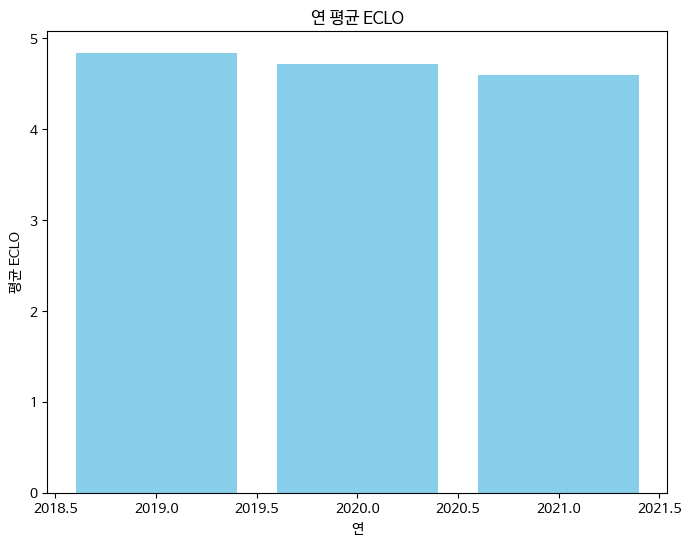

In [69]:
# 연별 ECLO의 평균 계산
mean_eclo_by_weather = train_df.groupby('연')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['연'], mean_eclo_by_weather['ECLO'], color='skyblue')
plt.title('연 평균 ECLO')
plt.xlabel('연')
plt.ylabel('평균 ECLO')
plt.show()

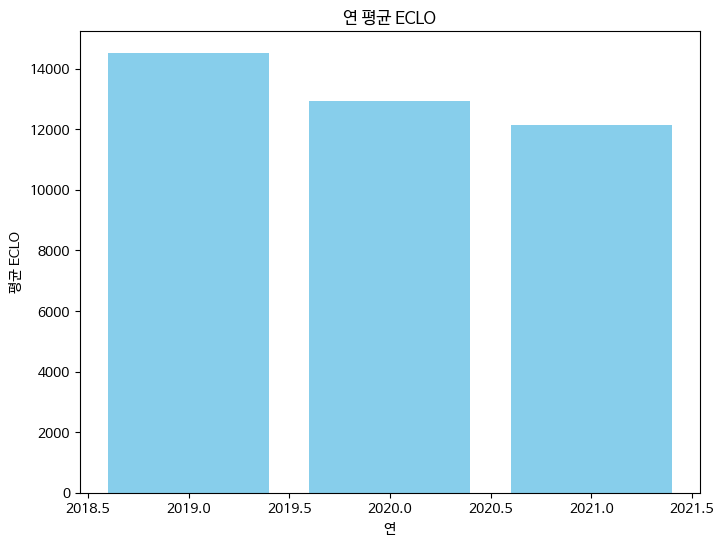

In [70]:
# 연별 사고발생횟수 계산
mean_eclo_by_weather = train_df.groupby('연')['ID'].count().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['연'], mean_eclo_by_weather['ID'], color='skyblue')
plt.title('연 평균 ECLO')
plt.xlabel('연')
plt.ylabel('평균 ECLO')
plt.show()

In [71]:
train_df.연.value_counts()

연
2019    14524
2020    12926
2021    12123
Name: count, dtype: int64

In [72]:
train_df.groupby('연').outlier.value_counts()

연     outlier
2019  False      14202
      True         322
2020  False      12668
      True         258
2021  False      11925
      True         198
Name: count, dtype: int64

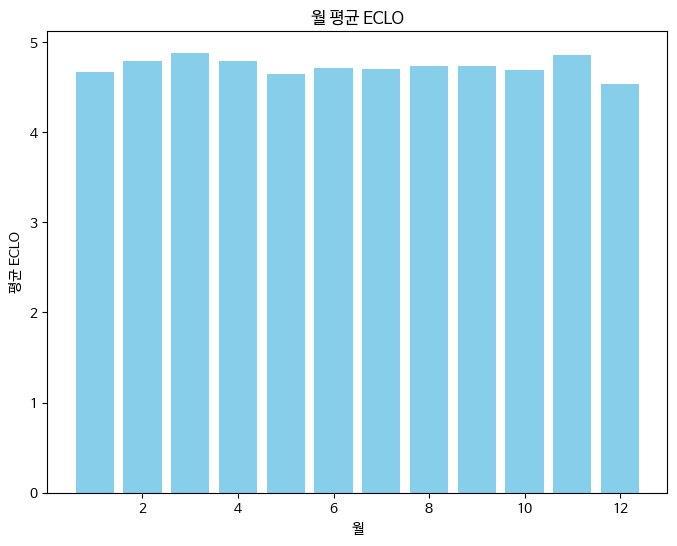

In [73]:
mean_eclo_by_weather = train_df.groupby('월')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['월'], mean_eclo_by_weather['ECLO'], color='skyblue')
plt.title('월 평균 ECLO')
plt.xlabel('월')
plt.ylabel('평균 ECLO')
plt.show()

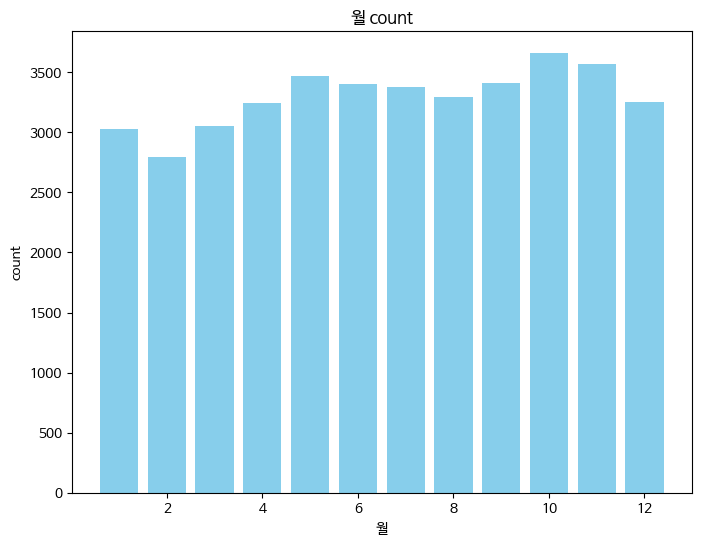

In [74]:
mean_eclo_by_weather = train_df.groupby('월')['ID'].count().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['월'], mean_eclo_by_weather['ID'], color='skyblue')
plt.title('월 count')
plt.xlabel('월')
plt.ylabel('count')
plt.show()

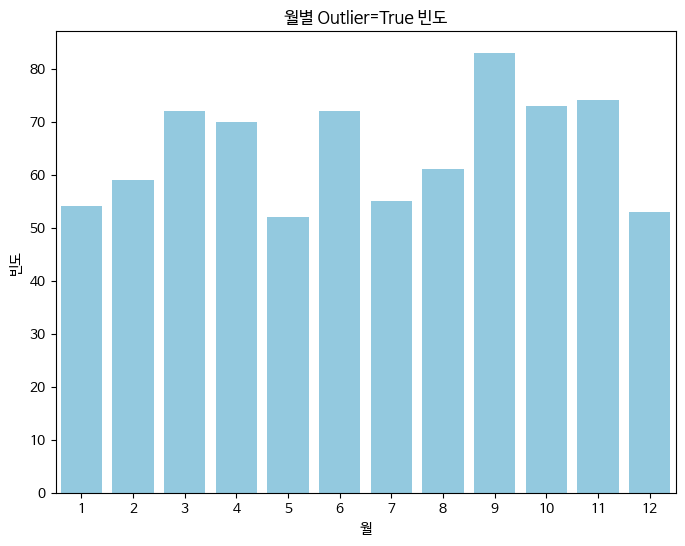

In [75]:
# outlier가 True인 값의 수를 월별로 계산
outlier_counts = train_df[train_df['outlier']].groupby('월').size()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, color='skyblue')
plt.title('월별 Outlier=True 빈도')
plt.xlabel('월')
plt.ylabel('빈도')
plt.show()

In [76]:
# 새로운 변수 생성
train_df['special_month'] = train_df['월'].isin([1, 2, 5, 7, 8, 12]).astype(int)

In [77]:
# 새로운 변수 생성
test_df['special_month'] = test_df['월'].isin([1, 2, 5, 7, 8, 12]).astype(int)

In [109]:
# 계절 변수 생성
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

train_df['계절'] = train_df['월'].apply(get_season)
test_df['계절'] = test_df['월'].apply(get_season)

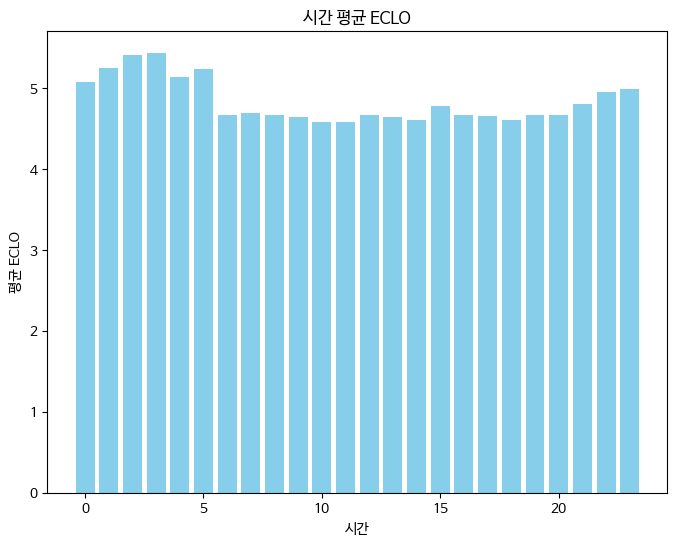

In [78]:
mean_eclo_by_weather = train_df.groupby('시간')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean_eclo_by_weather['시간'], mean_eclo_by_weather['ECLO'], color='skyblue')
plt.title('시간 평균 ECLO')
plt.xlabel('시간')
plt.ylabel('평균 ECLO')
plt.show()

In [79]:
train_df['활동시간대'] = train_df['시간'].apply(lambda x: 1 if 6 <= x <= 21 else 0)
test_df['활동시간대'] = test_df['시간'].apply(lambda x: 1 if 6 <= x <= 21 else 0)

In [ ]:
#train_df = train_df.drop(columns=['시간','월'])
#test_df = test_df.drop(columns=['시간','월'])

## 요일
- 주말(토,일)이 눈에 띄게 차이가 남
- 공휴일 포함해서 holiday(주말) 변수 생성

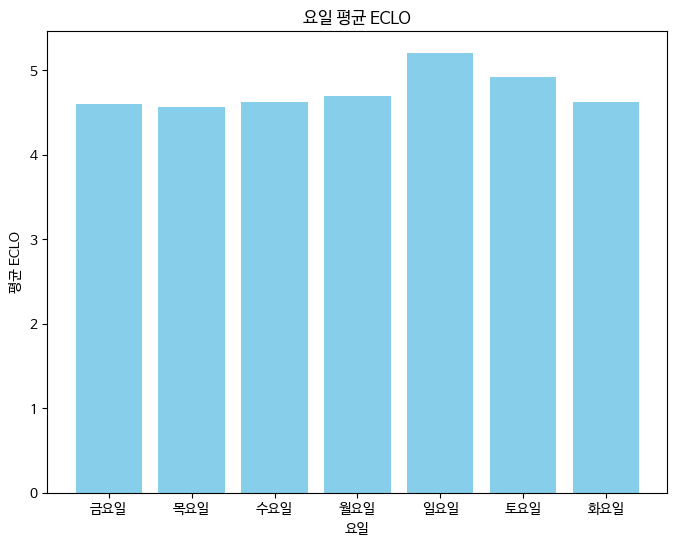

In [80]:
mean = train_df.groupby('요일')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['요일'], mean['ECLO'], color='skyblue')
plt.title('요일 평균 ECLO')
plt.xlabel('요일')
plt.ylabel('평균 ECLO')
plt.show()

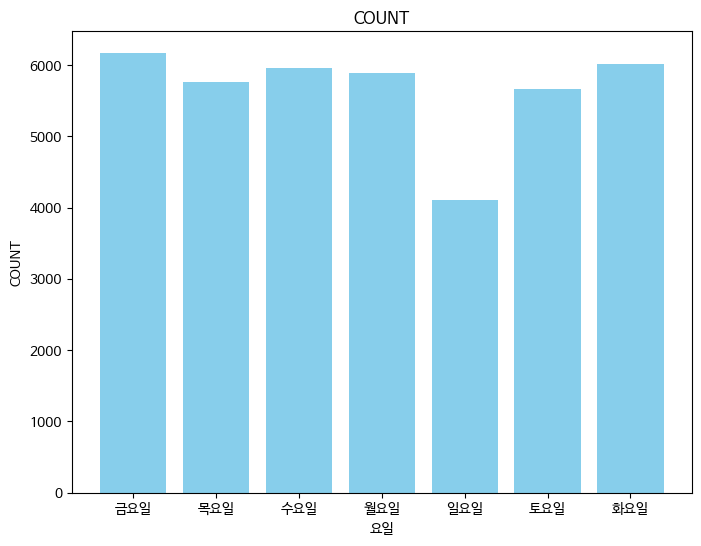

In [81]:
mean = train_df.groupby('요일')['ID'].count().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['요일'], mean['ID'], color='skyblue')
plt.title('COUNT')
plt.xlabel('요일')
plt.ylabel('COUNT')
plt.show()

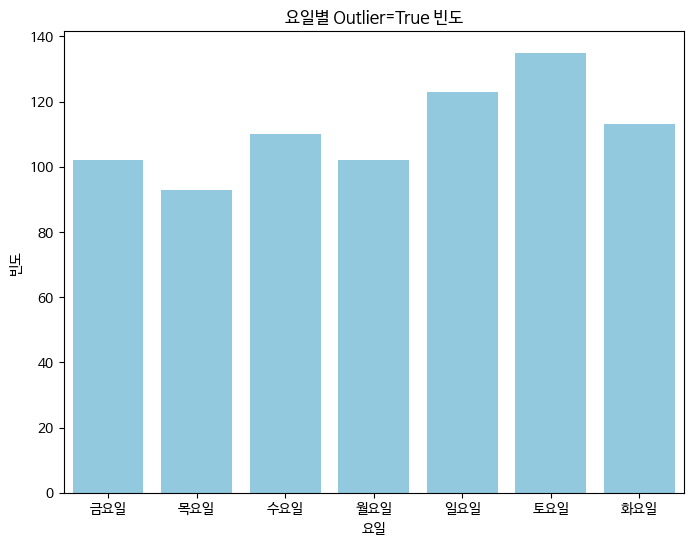

In [82]:
outlier_counts = train_df[train_df['outlier']].groupby('요일').size()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, color='skyblue')
plt.title('요일별 Outlier=True 빈도')
plt.xlabel('요일')
plt.ylabel('빈도')
plt.show()

In [83]:
# datetime 컬럼 처리
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
test_df['사고일시'] = pd.to_datetime(test_df['사고일시'])

# datetime을 여러 파생 변수로 변환
for df in [train_df, test_df]:
    df['year'] = df['사고일시'].dt.year
    df['month'] = df['사고일시'].dt.month
    df['day'] = df['사고일시'].dt.day
    df['hour'] = df['사고일시'].dt.hour
    df['minute'] = df['사고일시'].dt.minute
    df['weekday'] = df['사고일시'].dt.weekday

In [84]:
holi_weekday = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01']

In [85]:
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
train_df['day_of_week'] = train_df['사고일시'].dt.dayofweek
train_df['holiday'] = np.where((train_df.day_of_week >= 5) | (train_df.사고일시.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

In [86]:
test_df['사고일시'] = pd.to_datetime(test_df['사고일시'])
test_df['day_of_week'] = test_df['사고일시'].dt.dayofweek
test_df['holiday'] = np.where((test_df.day_of_week >= 5) | (test_df.사고일시.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

# holiday -> 주말 컬럼

In [87]:
train_df = train_df.drop(columns=['year','month','day','hour','minute','weekday','day_of_week','사고일시'])
test_df = test_df.drop(columns=['year','month','day','hour','minute','weekday','day_of_week','사고일시'])

In [88]:
test_df.columns

Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '시군구별평균ECLO', '시군구별사고발생횟수',
       '도시', '구', '동', '연', '월', '일', '시간', 'special_month', '활동시간대',
       'holiday'],
      dtype='object')

## 도로형태
- 도로형태 -> 도로형태1, 도로형태2 로 분리
- 도로형태 count 특징 -> 개수 따라서 자연스러운 결과 같음

In [89]:
train_df.도로형태.value_counts()

도로형태
단일로 - 기타           19460
교차로 - 교차로안          9923
교차로 - 교차로부근         5745
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            235
단일로 - 교량             231
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64

In [90]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_df['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_df['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

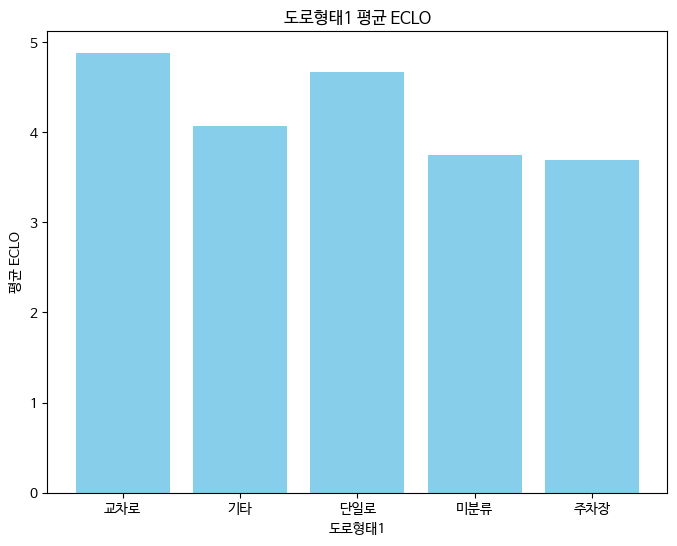

In [91]:
mean = train_df.groupby('도로형태1')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['도로형태1'], mean['ECLO'], color='skyblue')
plt.title('도로형태1 평균 ECLO')
plt.xlabel('도로형태1')
plt.ylabel('평균 ECLO')
plt.show()

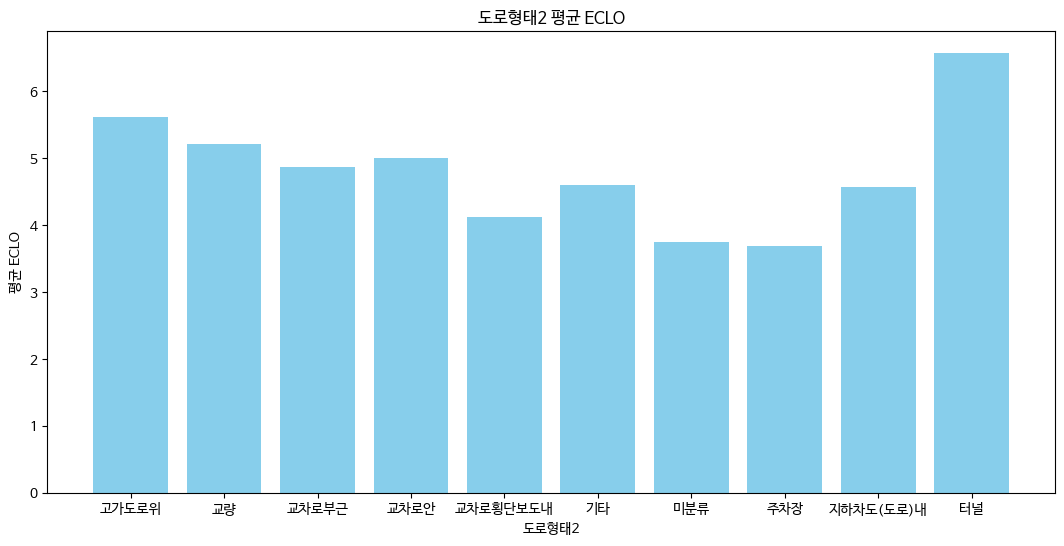

In [92]:
mean = train_df.groupby('도로형태2')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(13, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['도로형태2'], mean['ECLO'], color='skyblue')
plt.title('도로형태2 평균 ECLO')
plt.xlabel('도로형태2')
plt.ylabel('평균 ECLO')
plt.show()

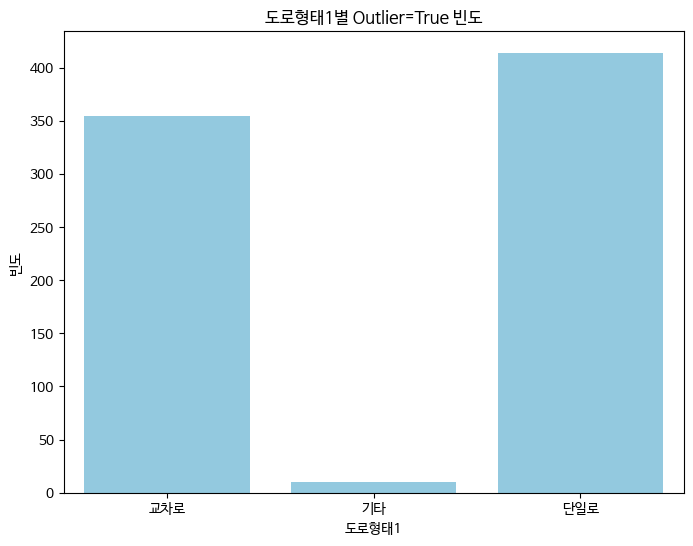

In [93]:
outlier_counts = train_df[train_df['outlier']].groupby('도로형태1').size()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, color='skyblue')
plt.title('도로형태1별 Outlier=True 빈도')
plt.xlabel('도로형태1')
plt.ylabel('빈도')
plt.show()

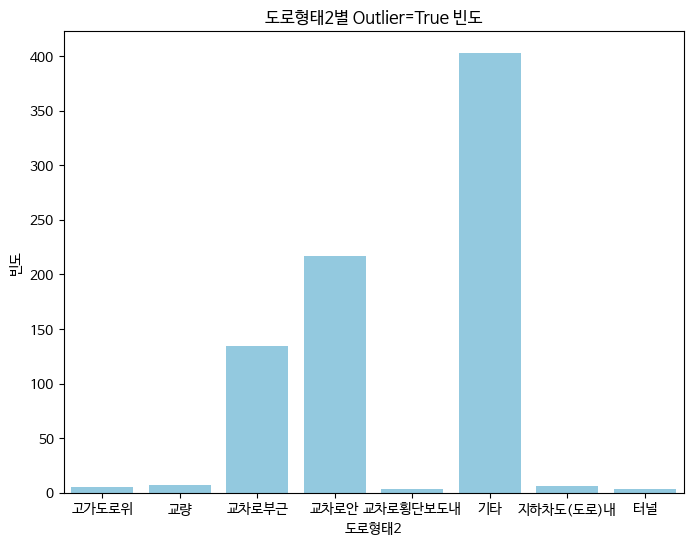

In [94]:
# 단일로 - 기타

outlier_counts = train_df[train_df['outlier']].groupby('도로형태2').size()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, color='skyblue')
plt.title('도로형태2별 Outlier=True 빈도')
plt.xlabel('도로형태2')
plt.ylabel('빈도')
plt.show()

## 노면상태
- 기타, 서리/결빙, 침수, 적설 -> 기타로 합침

In [95]:
train_df.노면상태.value_counts()

노면상태
건조       36393
젖음/습기     3094
기타          56
서리/결빙       24
침수           3
적설           3
Name: count, dtype: int64

In [96]:
test_df.노면상태.value_counts()

노면상태
건조       10394
젖음/습기      524
기타          35
서리/결빙        7
침수           2
적설           1
Name: count, dtype: int64

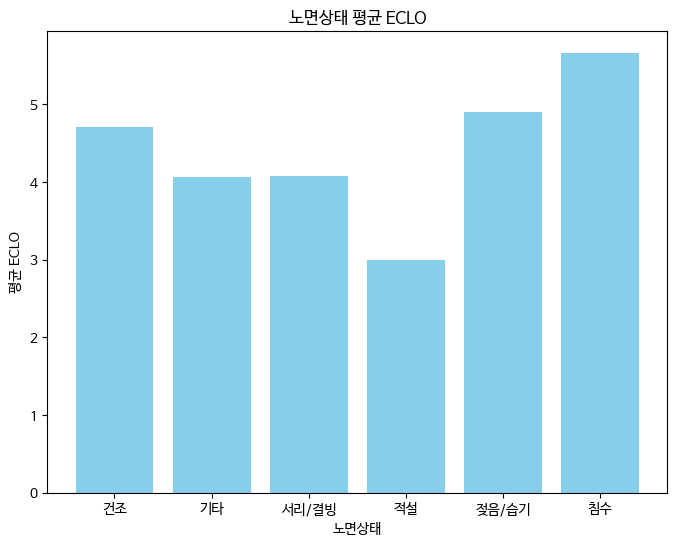

In [97]:
mean = train_df.groupby('노면상태')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['노면상태'], mean['ECLO'], color='skyblue')
plt.title('노면상태 평균 ECLO')
plt.xlabel('노면상태')
plt.ylabel('평균 ECLO')
plt.show()

In [98]:
train_df.loc[train_df.노면상태.str.contains('기타|서리/결빙|침수|적설'), '노면상태'] = '기타'
test_df.loc[test_df.노면상태.str.contains('기타|서리/결빙|침수|적설'), '노면상태'] = '기타'

In [99]:
train_df.노면상태.value_counts()

노면상태
건조       36393
젖음/습기     3094
기타          86
Name: count, dtype: int64

In [100]:
test_df.노면상태.value_counts()

노면상태
건조       10394
젖음/습기      524
기타          45
Name: count, dtype: int64

## 사고유형

In [101]:
train_df.사고유형.value_counts()

사고유형
차대차     31763
차대사람     6827
차량단독      983
Name: count, dtype: int64

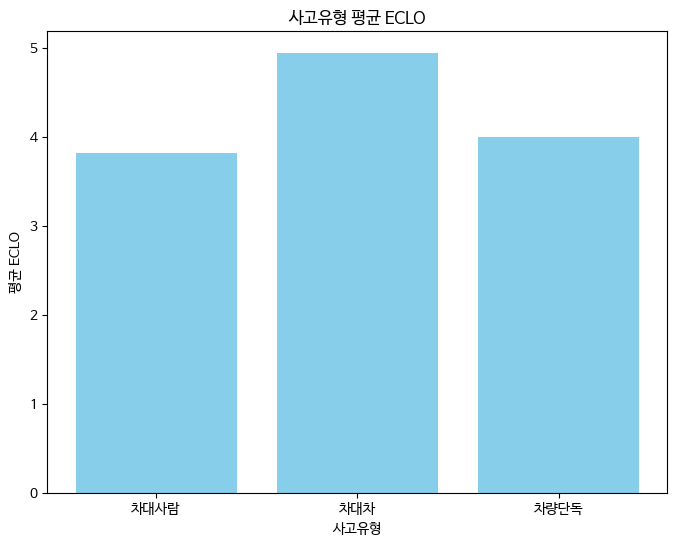

In [102]:
mean = train_df.groupby('사고유형')['ECLO'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(mean['사고유형'], mean['ECLO'], color='skyblue')
plt.title('사고유형 평균 ECLO')
plt.xlabel('사고유형')
plt.ylabel('평균 ECLO')
plt.show()

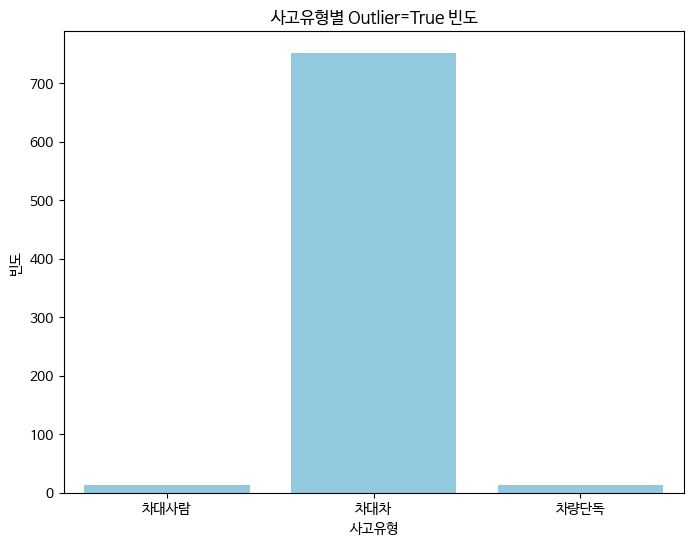

In [103]:
outlier_counts = train_df[train_df['outlier']].groupby('사고유형').size()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, color='skyblue')
plt.title('사고유형별 Outlier=True 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도')
plt.show()

## train,test 최종 확인

In [104]:
train_df = train_df.drop(columns=['도시'])
test_df = test_df.drop(columns=['도시'])

In [110]:
train_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO',
       'outlier', '시군구별평균ECLO', '시군구별사고발생횟수', '구', '동', '연', '월', '일', '시간',
       'special_month', '활동시간대', 'holiday', '도로형태1', '도로형태2', '계절'],
      dtype='object')

In [111]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '시군구별평균ECLO', '시군구별사고발생횟수', '구',
       '동', '연', '월', '일', '시간', 'special_month', '활동시간대', 'holiday', '도로형태1',
       '도로형태2', '계절'],
      dtype='object')

In [112]:
train_df.isnull().sum()

ID                 0
요일                 0
기상상태               0
노면상태               0
사고유형               0
사고유형 - 세부분류        0
법규위반               0
가해운전자 차종           0
가해운전자 성별           0
가해운전자 연령           0
가해운전자 상해정도         0
피해운전자 차종         983
피해운전자 성별         983
피해운전자 연령         983
피해운전자 상해정도       983
사망자수               0
중상자수               0
경상자수               0
부상자수               0
ECLO               0
outlier            0
시군구별평균ECLO         0
시군구별사고발생횟수         0
구                  0
동                  0
연                  0
월                  0
일                  0
시간                 0
special_month      0
활동시간대              0
holiday            0
도로형태1              0
도로형태2              0
계절                 0
dtype: int64

In [113]:
test_df.isnull().sum()

ID               0
요일               0
기상상태             0
노면상태             0
사고유형             0
시군구별평균ECLO       0
시군구별사고발생횟수       0
구                0
동                0
연                0
월                0
일                0
시간               0
special_month    0
활동시간대            0
holiday          0
도로형태1            0
도로형태2            0
계절               0
dtype: int64

## 외부데이터 - 어린이보호구역정보
- 지오코딩으로 결측치 보간
- 어린이보호구역점수 :  CCTV설치여부가 Y면 1, CCTV설치여부가 N이면 0.5

In [171]:
child_area_df = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949').drop_duplicates().reset_index(drop=True)

In [172]:
child_area_df.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


In [160]:
len(child_area_df)

541

In [161]:
child_area_df.isnull().sum()

시설종류          0
대상시설명         0
소재지도로명주소      0
소재지지번주소      85
위도            0
경도            0
관리기관명         0
관할경찰서명        0
CCTV설치여부      0
CCTV설치대수    175
보호구역도로폭     221
데이터기준일자       0
dtype: int64

In [162]:
child_area_df.CCTV설치대수.value_counts()

CCTV설치대수
0.0     95
1.0     76
2.0     67
4.0     45
3.0     31
5.0     22
6.0      8
8.0      6
7.0      4
12.0     4
9.0      3
14.0     2
11.0     2
10.0     1
Name: count, dtype: int64

In [163]:
from tqdm import tqdm
from urllib import parse
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

In [148]:
Client_ID = ''
Client_Secret = ''
api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

In [150]:
# 역지오코딩

jibun_list = []

for i in tqdm(range(len(child_area_df))):
    test = child_area_df.loc[i, '소재지도로명주소']
    add_urlenc = parse.quote(test) # URL Encoding
    url = api_url + add_urlenc

    request = Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID', Client_ID)
    request.add_header('X-NCP-APIGW-API-KEY', Client_Secret)

    try:
        response = urlopen(request)

    except HTTPError as e:
        print('HTTP Error')
        jibun = None

    else:
        rescode = response.getcode()

        if rescode == 200:
            response_body = response.read().decode('utf-8')
            response_body = json.loads(response_body)

            if response_body['addresses'] == []:
                print('No result')
            else:
                jibun = response_body['addresses'][0]['jibunAddress']
                print('Success')
        else:
            print(f'Response error, rescode:{rescode}')
            jibun = None

    jibun_list.append(jibun)

  0%|          | 1/541 [00:01<12:19,  1.37s/it]

Success


  0%|          | 2/541 [00:02<10:16,  1.14s/it]

Success


  1%|          | 3/541 [00:03<09:33,  1.07s/it]

Success


  1%|          | 4/541 [00:04<09:06,  1.02s/it]

Success


  1%|          | 5/541 [00:05<08:53,  1.00it/s]

Success


  1%|          | 6/541 [00:06<09:11,  1.03s/it]

Success


  1%|▏         | 7/541 [00:07<08:59,  1.01s/it]

Success


  1%|▏         | 8/541 [00:08<08:50,  1.00it/s]

Success


  2%|▏         | 9/541 [00:09<09:18,  1.05s/it]

Success


  2%|▏         | 10/541 [00:10<09:03,  1.02s/it]

Success


  2%|▏         | 11/541 [00:11<08:54,  1.01s/it]

Success


  2%|▏         | 12/541 [00:12<08:46,  1.00it/s]

Success


  2%|▏         | 13/541 [00:13<08:39,  1.02it/s]

Success


  3%|▎         | 14/541 [00:14<08:57,  1.02s/it]

Success


  3%|▎         | 15/541 [00:15<09:10,  1.05s/it]

Success


  3%|▎         | 16/541 [00:16<09:18,  1.06s/it]

Success


  3%|▎         | 17/541 [00:17<09:02,  1.03s/it]

Success


  3%|▎         | 18/541 [00:18<09:08,  1.05s/it]

Success


  4%|▎         | 19/541 [00:19<08:55,  1.03s/it]

Success


  4%|▎         | 20/541 [00:20<09:05,  1.05s/it]

Success


  4%|▍         | 21/541 [00:21<09:11,  1.06s/it]

Success


  4%|▍         | 22/541 [00:22<09:17,  1.07s/it]

Success


  4%|▍         | 23/541 [00:24<09:20,  1.08s/it]

Success


  4%|▍         | 24/541 [00:25<09:22,  1.09s/it]

Success


  5%|▍         | 25/541 [00:26<09:02,  1.05s/it]

Success


  5%|▍         | 26/541 [00:27<09:07,  1.06s/it]

Success


  5%|▍         | 27/541 [00:28<09:11,  1.07s/it]

Success


  5%|▌         | 28/541 [00:29<09:17,  1.09s/it]

Success


  5%|▌         | 29/541 [00:30<09:21,  1.10s/it]

Success


  6%|▌         | 30/541 [00:32<10:34,  1.24s/it]

Success


  6%|▌         | 31/541 [00:33<10:11,  1.20s/it]

Success


  6%|▌         | 32/541 [00:34<09:33,  1.13s/it]

Success


  6%|▌         | 33/541 [00:35<09:27,  1.12s/it]

Success


  6%|▋         | 34/541 [00:36<09:01,  1.07s/it]

Success


  6%|▋         | 35/541 [00:37<09:05,  1.08s/it]

Success


  7%|▋         | 36/541 [00:38<08:48,  1.05s/it]

Success


  7%|▋         | 37/541 [00:39<08:53,  1.06s/it]

Success


  7%|▋         | 38/541 [00:40<08:49,  1.05s/it]

Success


  7%|▋         | 39/541 [00:41<08:54,  1.06s/it]

Success


  7%|▋         | 40/541 [00:42<09:01,  1.08s/it]

Success


  8%|▊         | 41/541 [00:43<09:02,  1.08s/it]

Success


  8%|▊         | 42/541 [00:44<08:44,  1.05s/it]

Success


  8%|▊         | 43/541 [00:45<08:29,  1.02s/it]

Success


  8%|▊         | 44/541 [00:46<08:35,  1.04s/it]

Success


  8%|▊         | 45/541 [00:47<08:43,  1.06s/it]

Success


  9%|▊         | 46/541 [00:48<08:31,  1.03s/it]

Success


  9%|▊         | 47/541 [00:49<08:20,  1.01s/it]

Success


  9%|▉         | 48/541 [00:50<08:31,  1.04s/it]

Success


  9%|▉         | 49/541 [00:51<08:38,  1.05s/it]

Success


  9%|▉         | 50/541 [00:53<08:41,  1.06s/it]

Success


  9%|▉         | 51/541 [00:54<08:43,  1.07s/it]

Success


 10%|▉         | 52/541 [00:55<08:59,  1.10s/it]

Success


 10%|▉         | 53/541 [00:56<08:36,  1.06s/it]

Success


 10%|▉         | 54/541 [00:57<08:22,  1.03s/it]

Success


 10%|█         | 55/541 [00:58<08:09,  1.01s/it]

Success


 10%|█         | 56/541 [00:59<08:03,  1.00it/s]

Success


 11%|█         | 57/541 [01:00<07:55,  1.02it/s]

Success


 11%|█         | 58/541 [01:01<08:37,  1.07s/it]

Success


 11%|█         | 59/541 [01:02<09:39,  1.20s/it]

Success


 11%|█         | 60/541 [01:03<09:21,  1.17s/it]

Success


 11%|█▏        | 61/541 [01:04<08:48,  1.10s/it]

Success


 11%|█▏        | 62/541 [01:05<08:28,  1.06s/it]

Success


 12%|█▏        | 63/541 [01:06<08:13,  1.03s/it]

Success


 12%|█▏        | 64/541 [01:07<08:23,  1.05s/it]

Success


 12%|█▏        | 65/541 [01:08<08:08,  1.03s/it]

Success


 12%|█▏        | 66/541 [01:09<08:15,  1.04s/it]

Success


 12%|█▏        | 67/541 [01:10<08:04,  1.02s/it]

Success


 13%|█▎        | 68/541 [01:11<07:54,  1.00s/it]

Success


 13%|█▎        | 69/541 [01:12<07:47,  1.01it/s]

Success


 13%|█▎        | 70/541 [01:13<07:58,  1.02s/it]

Success


 13%|█▎        | 71/541 [01:14<07:49,  1.00it/s]

Success


 13%|█▎        | 72/541 [01:15<07:43,  1.01it/s]

Success


 13%|█▎        | 73/541 [01:16<07:56,  1.02s/it]

Success


 14%|█▎        | 74/541 [01:17<07:47,  1.00s/it]

Success


 14%|█▍        | 75/541 [01:19<07:58,  1.03s/it]

Success


 14%|█▍        | 76/541 [01:19<07:48,  1.01s/it]

Success


 14%|█▍        | 77/541 [01:21<08:54,  1.15s/it]

Success


 14%|█▍        | 78/541 [01:22<08:27,  1.10s/it]

Success


 15%|█▍        | 79/541 [01:23<08:51,  1.15s/it]

Success


 15%|█▍        | 80/541 [01:24<08:44,  1.14s/it]

Success


 15%|█▍        | 81/541 [01:25<08:39,  1.13s/it]

Success


 15%|█▌        | 82/541 [01:27<08:34,  1.12s/it]

Success


 15%|█▌        | 83/541 [01:27<08:11,  1.07s/it]

Success


 16%|█▌        | 84/541 [01:28<07:52,  1.03s/it]

Success


 16%|█▌        | 85/541 [01:29<07:42,  1.01s/it]

Success


 16%|█▌        | 86/541 [01:30<07:49,  1.03s/it]

Success


 16%|█▌        | 87/541 [01:32<07:56,  1.05s/it]

Success


 16%|█▋        | 88/541 [01:33<07:45,  1.03s/it]

Success


 16%|█▋        | 89/541 [01:33<07:35,  1.01s/it]

Success


 17%|█▋        | 90/541 [01:35<07:43,  1.03s/it]

Success


 17%|█▋        | 91/541 [01:36<07:52,  1.05s/it]

Success


 17%|█▋        | 92/541 [01:37<07:39,  1.02s/it]

Success


 17%|█▋        | 93/541 [01:38<07:29,  1.00s/it]

Success


 17%|█▋        | 94/541 [01:39<07:41,  1.03s/it]

Success


 18%|█▊        | 95/541 [01:40<07:51,  1.06s/it]

Success


 18%|█▊        | 96/541 [01:41<07:54,  1.07s/it]

Success


 18%|█▊        | 97/541 [01:42<07:40,  1.04s/it]

Success


 18%|█▊        | 98/541 [01:43<07:47,  1.05s/it]

Success


 18%|█▊        | 99/541 [01:44<07:32,  1.02s/it]

Success


 18%|█▊        | 100/541 [01:45<07:26,  1.01s/it]

Success


 19%|█▊        | 101/541 [01:46<07:19,  1.00it/s]

Success


 19%|█▉        | 102/541 [01:47<07:15,  1.01it/s]

Success


 19%|█▉        | 103/541 [01:48<07:09,  1.02it/s]

Success


 19%|█▉        | 104/541 [01:49<07:23,  1.01s/it]

Success


 19%|█▉        | 105/541 [01:50<07:33,  1.04s/it]

Success


 20%|█▉        | 106/541 [01:51<07:20,  1.01s/it]

Success


 20%|█▉        | 107/541 [01:52<07:11,  1.01it/s]

Success


 20%|█▉        | 108/541 [01:54<08:40,  1.20s/it]

Success


 20%|██        | 109/541 [01:55<08:10,  1.14s/it]

Success


 20%|██        | 110/541 [01:56<08:03,  1.12s/it]

Success


 21%|██        | 111/541 [01:57<07:57,  1.11s/it]

Success


 21%|██        | 112/541 [01:58<07:38,  1.07s/it]

Success


 21%|██        | 113/541 [01:59<07:22,  1.03s/it]

Success


 21%|██        | 114/541 [02:00<07:12,  1.01s/it]

Success


 21%|██▏       | 115/541 [02:01<07:04,  1.00it/s]

Success


 21%|██▏       | 116/541 [02:02<07:19,  1.03s/it]

Success


 22%|██▏       | 117/541 [02:03<07:28,  1.06s/it]

Success


 22%|██▏       | 118/541 [02:04<07:16,  1.03s/it]

Success


 22%|██▏       | 119/541 [02:05<07:04,  1.01s/it]

Success


 22%|██▏       | 120/541 [02:06<06:58,  1.01it/s]

Success


 22%|██▏       | 121/541 [02:07<07:09,  1.02s/it]

Success


 23%|██▎       | 122/541 [02:08<06:59,  1.00s/it]

Success


 23%|██▎       | 123/541 [02:09<07:11,  1.03s/it]

Success


 23%|██▎       | 124/541 [02:10<07:01,  1.01s/it]

Success


 23%|██▎       | 125/541 [02:11<06:53,  1.01it/s]

Success


 23%|██▎       | 126/541 [02:12<07:05,  1.02s/it]

Success


 23%|██▎       | 127/541 [02:13<06:57,  1.01s/it]

Success


 24%|██▎       | 128/541 [02:14<07:07,  1.03s/it]

Success


 24%|██▍       | 129/541 [02:15<06:56,  1.01s/it]

Success


 24%|██▍       | 130/541 [02:16<07:06,  1.04s/it]

Success


 24%|██▍       | 131/541 [02:17<06:56,  1.02s/it]

Success


 24%|██▍       | 132/541 [02:18<07:05,  1.04s/it]

Success


 25%|██▍       | 133/541 [02:19<06:54,  1.02s/it]

Success


 25%|██▍       | 134/541 [02:20<06:47,  1.00s/it]

Success


 25%|██▍       | 135/541 [02:21<06:42,  1.01it/s]

Success


 25%|██▌       | 136/541 [02:22<06:38,  1.02it/s]

Success


 25%|██▌       | 137/541 [02:23<06:36,  1.02it/s]

Success


 26%|██▌       | 138/541 [02:24<06:58,  1.04s/it]

Success


 26%|██▌       | 139/541 [02:25<06:48,  1.02s/it]

Success


 26%|██▌       | 140/541 [02:26<06:42,  1.00s/it]

Success


 26%|██▌       | 141/541 [02:27<06:35,  1.01it/s]

Success


 26%|██▌       | 142/541 [02:28<06:32,  1.02it/s]

Success


 26%|██▋       | 143/541 [02:29<06:29,  1.02it/s]

Success


 27%|██▋       | 144/541 [02:30<06:26,  1.03it/s]

Success


 27%|██▋       | 145/541 [02:31<06:39,  1.01s/it]

Success


 27%|██▋       | 146/541 [02:32<07:11,  1.09s/it]

Success


 27%|██▋       | 147/541 [02:33<06:57,  1.06s/it]

Success


 27%|██▋       | 148/541 [02:34<06:48,  1.04s/it]

Success


 28%|██▊       | 149/541 [02:35<06:40,  1.02s/it]

Success


 28%|██▊       | 150/541 [02:36<06:35,  1.01s/it]

Success


 28%|██▊       | 151/541 [02:37<06:28,  1.00it/s]

Success


 28%|██▊       | 152/541 [02:38<06:24,  1.01it/s]

Success


 28%|██▊       | 153/541 [02:39<06:38,  1.03s/it]

Success


 28%|██▊       | 154/541 [02:40<06:30,  1.01s/it]

Success


 29%|██▊       | 155/541 [02:41<06:23,  1.01it/s]

Success


 29%|██▉       | 156/541 [02:42<06:19,  1.02it/s]

Success


 29%|██▉       | 157/541 [02:43<06:17,  1.02it/s]

Success


 29%|██▉       | 158/541 [02:44<06:16,  1.02it/s]

Success


 29%|██▉       | 159/541 [02:45<06:12,  1.03it/s]

Success


 30%|██▉       | 160/541 [02:46<06:25,  1.01s/it]

Success


 30%|██▉       | 161/541 [02:47<06:35,  1.04s/it]

Success


 30%|██▉       | 162/541 [02:48<06:27,  1.02s/it]

Success


 30%|███       | 163/541 [02:49<06:21,  1.01s/it]

Success


 30%|███       | 164/541 [02:50<06:30,  1.04s/it]

Success


 30%|███       | 165/541 [02:51<06:38,  1.06s/it]

Success


 31%|███       | 166/541 [02:52<06:27,  1.03s/it]

Success


 31%|███       | 167/541 [02:53<06:19,  1.01s/it]

Success


 31%|███       | 168/541 [02:55<07:17,  1.17s/it]

Success


 31%|███       | 169/541 [02:56<06:58,  1.12s/it]

Success


 31%|███▏      | 170/541 [02:57<06:39,  1.08s/it]

Success


 32%|███▏      | 171/541 [02:58<06:38,  1.08s/it]

No result


 32%|███▏      | 172/541 [02:59<06:23,  1.04s/it]

Success


 32%|███▏      | 173/541 [03:00<06:13,  1.02s/it]

Success


 32%|███▏      | 174/541 [03:01<06:07,  1.00s/it]

Success


 32%|███▏      | 175/541 [03:02<06:44,  1.10s/it]

Success


 33%|███▎      | 176/541 [03:03<06:28,  1.06s/it]

Success


 33%|███▎      | 177/541 [03:04<06:18,  1.04s/it]

Success


 33%|███▎      | 178/541 [03:05<06:26,  1.07s/it]

Success


 33%|███▎      | 179/541 [03:06<06:15,  1.04s/it]

Success


 33%|███▎      | 180/541 [03:07<06:12,  1.03s/it]

Success


 33%|███▎      | 181/541 [03:08<06:19,  1.05s/it]

Success


 34%|███▎      | 182/541 [03:10<06:35,  1.10s/it]

Success


 34%|███▍      | 183/541 [03:11<06:19,  1.06s/it]

Success


 34%|███▍      | 184/541 [03:11<06:08,  1.03s/it]

Success


 34%|███▍      | 185/541 [03:12<06:00,  1.01s/it]

Success


 34%|███▍      | 186/541 [03:14<06:08,  1.04s/it]

Success


 35%|███▍      | 187/541 [03:15<05:59,  1.02s/it]

Success


 35%|███▍      | 188/541 [03:15<05:52,  1.00it/s]

Success


 35%|███▍      | 189/541 [03:16<05:47,  1.01it/s]

Success


 35%|███▌      | 190/541 [03:18<06:05,  1.04s/it]

Success


 35%|███▌      | 191/541 [03:19<05:56,  1.02s/it]

Success


 35%|███▌      | 192/541 [03:20<05:50,  1.00s/it]

Success


 36%|███▌      | 193/541 [03:20<05:45,  1.01it/s]

Success


 36%|███▌      | 194/541 [03:21<05:42,  1.01it/s]

Success


 36%|███▌      | 195/541 [03:22<05:39,  1.02it/s]

Success


 36%|███▌      | 196/541 [03:23<05:37,  1.02it/s]

Success


 36%|███▋      | 197/541 [03:24<05:35,  1.02it/s]

Success


 37%|███▋      | 198/541 [03:26<06:38,  1.16s/it]

Success


 37%|███▋      | 199/541 [03:27<06:29,  1.14s/it]

Success


 37%|███▋      | 200/541 [03:28<06:12,  1.09s/it]

Success


 37%|███▋      | 201/541 [03:29<06:13,  1.10s/it]

Success


 37%|███▋      | 202/541 [03:30<05:58,  1.06s/it]

Success


 38%|███▊      | 203/541 [03:31<05:50,  1.04s/it]

Success


 38%|███▊      | 204/541 [03:33<06:34,  1.17s/it]

Success


 38%|███▊      | 205/541 [03:34<06:12,  1.11s/it]

Success


 38%|███▊      | 206/541 [03:35<05:56,  1.06s/it]

Success


 38%|███▊      | 207/541 [03:36<05:58,  1.07s/it]

Success


 38%|███▊      | 208/541 [03:37<05:47,  1.04s/it]

Success


 39%|███▊      | 209/541 [03:38<05:51,  1.06s/it]

Success


 39%|███▉      | 210/541 [03:39<05:40,  1.03s/it]

Success


 39%|███▉      | 211/541 [03:40<05:32,  1.01s/it]

Success


 39%|███▉      | 212/541 [03:41<05:40,  1.03s/it]

Success


 39%|███▉      | 213/541 [03:42<05:31,  1.01s/it]

Success


 40%|███▉      | 214/541 [03:43<05:25,  1.00it/s]

Success


 40%|███▉      | 215/541 [03:44<05:21,  1.01it/s]

Success


 40%|███▉      | 216/541 [03:45<05:19,  1.02it/s]

Success


 40%|████      | 217/541 [03:46<05:16,  1.02it/s]

Success


 40%|████      | 218/541 [03:46<05:14,  1.03it/s]

Success


 40%|████      | 219/541 [03:47<05:13,  1.03it/s]

Success


 41%|████      | 220/541 [03:48<05:13,  1.02it/s]

Success


 41%|████      | 221/541 [03:49<05:12,  1.02it/s]

Success


 41%|████      | 222/541 [03:50<05:11,  1.02it/s]

Success


 41%|████      | 223/541 [03:51<05:10,  1.02it/s]

No result


 41%|████▏     | 224/541 [03:52<05:07,  1.03it/s]

No result


 42%|████▏     | 225/541 [03:53<05:06,  1.03it/s]

Success


 42%|████▏     | 226/541 [03:54<05:05,  1.03it/s]

Success


 42%|████▏     | 227/541 [03:55<05:03,  1.03it/s]

Success


 42%|████▏     | 228/541 [03:57<05:45,  1.10s/it]

Success


 42%|████▏     | 229/541 [03:58<05:31,  1.06s/it]

Success


 43%|████▎     | 230/541 [03:59<05:33,  1.07s/it]

Success


 43%|████▎     | 231/541 [04:00<05:21,  1.04s/it]

Success


 43%|████▎     | 232/541 [04:01<05:14,  1.02s/it]

Success


 43%|████▎     | 233/541 [04:02<05:08,  1.00s/it]

Success


 43%|████▎     | 234/541 [04:03<06:08,  1.20s/it]

Success


 43%|████▎     | 235/541 [04:04<05:44,  1.13s/it]

Success


 44%|████▎     | 236/541 [04:05<05:29,  1.08s/it]

Success


 44%|████▍     | 237/541 [04:06<05:30,  1.09s/it]

Success


 44%|████▍     | 238/541 [04:07<05:19,  1.05s/it]

Success


 44%|████▍     | 239/541 [04:08<05:13,  1.04s/it]

Success


 44%|████▍     | 240/541 [04:09<05:06,  1.02s/it]

Success


 45%|████▍     | 241/541 [04:10<05:02,  1.01s/it]

Success


 45%|████▍     | 242/541 [04:11<04:57,  1.00it/s]

Success


 45%|████▍     | 243/541 [04:12<04:54,  1.01it/s]

Success


 45%|████▌     | 244/541 [04:13<04:51,  1.02it/s]

Success


 45%|████▌     | 245/541 [04:14<04:48,  1.03it/s]

Success


 45%|████▌     | 246/541 [04:15<04:47,  1.03it/s]

Success


 46%|████▌     | 247/541 [04:16<04:56,  1.01s/it]

Success


 46%|████▌     | 248/541 [04:17<04:52,  1.00it/s]

Success


 46%|████▌     | 249/541 [04:18<04:47,  1.02it/s]

Success


 46%|████▌     | 250/541 [04:19<04:56,  1.02s/it]

Success


 46%|████▋     | 251/541 [04:20<04:51,  1.00s/it]

Success


 47%|████▋     | 252/541 [04:21<04:45,  1.01it/s]

Success


 47%|████▋     | 253/541 [04:22<04:54,  1.02s/it]

Success


 47%|████▋     | 254/541 [04:23<04:47,  1.00s/it]

Success


 47%|████▋     | 255/541 [04:24<04:43,  1.01it/s]

Success


 47%|████▋     | 256/541 [04:25<04:40,  1.02it/s]

Success


 48%|████▊     | 257/541 [04:26<04:38,  1.02it/s]

Success


 48%|████▊     | 258/541 [04:27<04:39,  1.01it/s]

Success


 48%|████▊     | 259/541 [04:28<04:48,  1.02s/it]

Success


 48%|████▊     | 260/541 [04:29<04:55,  1.05s/it]

Success


 48%|████▊     | 261/541 [04:30<04:46,  1.02s/it]

Success


 48%|████▊     | 262/541 [04:31<04:53,  1.05s/it]

Success


 49%|████▊     | 263/541 [04:32<04:43,  1.02s/it]

Success


 49%|████▉     | 264/541 [04:33<04:38,  1.00s/it]

Success


 49%|████▉     | 265/541 [04:35<05:08,  1.12s/it]

Success


 49%|████▉     | 266/541 [04:36<04:55,  1.08s/it]

Success


 49%|████▉     | 267/541 [04:37<04:45,  1.04s/it]

Success


 50%|████▉     | 268/541 [04:38<04:39,  1.02s/it]

Success


 50%|████▉     | 269/541 [04:39<04:34,  1.01s/it]

Success


 50%|████▉     | 270/541 [04:40<04:40,  1.03s/it]

Success


 50%|█████     | 271/541 [04:41<04:43,  1.05s/it]

Success


 50%|█████     | 272/541 [04:42<04:45,  1.06s/it]

Success


 50%|█████     | 273/541 [04:43<04:48,  1.07s/it]

Success


 51%|█████     | 274/541 [04:44<04:38,  1.04s/it]

Success


 51%|█████     | 275/541 [04:45<04:33,  1.03s/it]

Success


 51%|█████     | 276/541 [04:46<04:28,  1.01s/it]

Success


 51%|█████     | 277/541 [04:47<04:33,  1.04s/it]

Success


 51%|█████▏    | 278/541 [04:48<04:27,  1.02s/it]

Success


 52%|█████▏    | 279/541 [04:49<04:22,  1.00s/it]

Success


 52%|█████▏    | 280/541 [04:50<04:19,  1.01it/s]

Success


 52%|█████▏    | 281/541 [04:51<04:17,  1.01it/s]

Success


 52%|█████▏    | 282/541 [04:52<04:25,  1.03s/it]

Success


 52%|█████▏    | 283/541 [04:53<04:21,  1.01s/it]

Success


 52%|█████▏    | 284/541 [04:54<04:16,  1.00it/s]

Success


 53%|█████▎    | 285/541 [04:55<04:14,  1.01it/s]

Success


 53%|█████▎    | 286/541 [04:56<04:10,  1.02it/s]

Success


 53%|█████▎    | 287/541 [04:57<04:36,  1.09s/it]

Success


 53%|█████▎    | 288/541 [04:58<04:36,  1.09s/it]

Success


 53%|█████▎    | 289/541 [04:59<04:25,  1.05s/it]

Success


 54%|█████▎    | 290/541 [05:00<04:26,  1.06s/it]

Success


 54%|█████▍    | 291/541 [05:01<04:18,  1.04s/it]

Success


 54%|█████▍    | 292/541 [05:02<04:14,  1.02s/it]

Success


 54%|█████▍    | 293/541 [05:03<04:19,  1.05s/it]

Success


 54%|█████▍    | 294/541 [05:04<04:11,  1.02s/it]

Success


 55%|█████▍    | 295/541 [05:05<04:17,  1.05s/it]

Success


 55%|█████▍    | 296/541 [05:06<04:10,  1.02s/it]

Success


 55%|█████▍    | 297/541 [05:07<04:05,  1.01s/it]

Success


 55%|█████▌    | 298/541 [05:08<04:01,  1.01it/s]

Success


 55%|█████▌    | 299/541 [05:09<03:58,  1.02it/s]

Success


 55%|█████▌    | 300/541 [05:10<03:54,  1.03it/s]

Success


 56%|█████▌    | 301/541 [05:11<03:53,  1.03it/s]

Success


 56%|█████▌    | 302/541 [05:12<03:53,  1.02it/s]

Success


 56%|█████▌    | 303/541 [05:13<03:53,  1.02it/s]

Success


 56%|█████▌    | 304/541 [05:14<03:52,  1.02it/s]

Success


 56%|█████▋    | 305/541 [05:15<03:51,  1.02it/s]

Success


 57%|█████▋    | 306/541 [05:16<03:51,  1.02it/s]

Success


 57%|█████▋    | 307/541 [05:17<03:48,  1.02it/s]

Success


 57%|█████▋    | 308/541 [05:18<03:56,  1.02s/it]

Success


 57%|█████▋    | 309/541 [05:19<03:51,  1.00it/s]

Success


 57%|█████▋    | 310/541 [05:20<03:48,  1.01it/s]

Success


 57%|█████▋    | 311/541 [05:21<03:45,  1.02it/s]

Success


 58%|█████▊    | 312/541 [05:22<03:43,  1.02it/s]

Success


 58%|█████▊    | 313/541 [05:23<03:50,  1.01s/it]

Success


 58%|█████▊    | 314/541 [05:24<03:46,  1.00it/s]

Success


 58%|█████▊    | 315/541 [05:25<03:52,  1.03s/it]

Success


 58%|█████▊    | 316/541 [05:26<03:47,  1.01s/it]

Success


 59%|█████▊    | 317/541 [05:28<04:07,  1.10s/it]

Success


 59%|█████▉    | 318/541 [05:28<03:57,  1.06s/it]

Success


 59%|█████▉    | 319/541 [05:29<03:50,  1.04s/it]

Success


 59%|█████▉    | 320/541 [05:30<03:44,  1.02s/it]

Success


 59%|█████▉    | 321/541 [05:31<03:40,  1.00s/it]

Success


 60%|█████▉    | 322/541 [05:33<03:46,  1.03s/it]

Success


 60%|█████▉    | 323/541 [05:34<03:48,  1.05s/it]

Success


 60%|█████▉    | 324/541 [05:35<03:42,  1.02s/it]

Success


 60%|██████    | 325/541 [05:36<03:37,  1.00s/it]

Success


 60%|██████    | 326/541 [05:36<03:31,  1.01it/s]

Success


 60%|██████    | 327/541 [05:38<03:38,  1.02s/it]

Success


 61%|██████    | 328/541 [05:39<03:42,  1.04s/it]

Success


 61%|██████    | 329/541 [05:40<04:19,  1.22s/it]

Success


 61%|██████    | 330/541 [05:41<04:03,  1.15s/it]

Success


 61%|██████    | 331/541 [05:42<03:58,  1.14s/it]

Success


 61%|██████▏   | 332/541 [05:43<03:47,  1.09s/it]

Success


 62%|██████▏   | 333/541 [05:44<03:37,  1.05s/it]

Success


 62%|██████▏   | 334/541 [05:45<03:31,  1.02s/it]

Success


 62%|██████▏   | 335/541 [05:46<03:29,  1.02s/it]

Success


 62%|██████▏   | 336/541 [05:47<03:27,  1.01s/it]

Success


 62%|██████▏   | 337/541 [05:48<03:37,  1.06s/it]

Success


 62%|██████▏   | 338/541 [05:49<03:29,  1.03s/it]

Success


 63%|██████▎   | 339/541 [05:50<03:25,  1.02s/it]

Success


 63%|██████▎   | 340/541 [05:51<03:22,  1.01s/it]

Success


 63%|██████▎   | 341/541 [05:52<03:19,  1.00it/s]

Success


 63%|██████▎   | 342/541 [05:53<03:24,  1.03s/it]

Success


 63%|██████▎   | 343/541 [05:54<03:19,  1.01s/it]

Success


 64%|██████▎   | 344/541 [05:56<03:24,  1.04s/it]

Success


 64%|██████▍   | 345/541 [05:57<03:19,  1.02s/it]

Success


 64%|██████▍   | 346/541 [05:58<03:52,  1.19s/it]

Success


 64%|██████▍   | 347/541 [05:59<03:45,  1.16s/it]

Success


 64%|██████▍   | 348/541 [06:00<03:32,  1.10s/it]

Success


 65%|██████▍   | 349/541 [06:01<03:23,  1.06s/it]

Success


 65%|██████▍   | 350/541 [06:02<03:16,  1.03s/it]

Success


 65%|██████▍   | 351/541 [06:03<03:19,  1.05s/it]

Success


 65%|██████▌   | 352/541 [06:04<03:19,  1.06s/it]

Success


 65%|██████▌   | 353/541 [06:05<03:13,  1.03s/it]

Success


 65%|██████▌   | 354/541 [06:06<03:08,  1.01s/it]

Success


 66%|██████▌   | 355/541 [06:07<03:05,  1.00it/s]

Success


 66%|██████▌   | 356/541 [06:08<03:12,  1.04s/it]

Success


 66%|██████▌   | 357/541 [06:09<03:07,  1.02s/it]

Success


 66%|██████▌   | 358/541 [06:10<03:14,  1.06s/it]

Success


 66%|██████▋   | 359/541 [06:11<03:08,  1.04s/it]

Success


 67%|██████▋   | 360/541 [06:12<03:10,  1.05s/it]

Success


 67%|██████▋   | 361/541 [06:13<03:06,  1.03s/it]

Success


 67%|██████▋   | 362/541 [06:14<03:01,  1.01s/it]

Success


 67%|██████▋   | 363/541 [06:16<03:05,  1.04s/it]

Success


 67%|██████▋   | 364/541 [06:17<03:00,  1.02s/it]

Success


 67%|██████▋   | 365/541 [06:18<03:02,  1.04s/it]

Success


 68%|██████▊   | 366/541 [06:19<02:57,  1.01s/it]

Success


 68%|██████▊   | 367/541 [06:20<03:01,  1.04s/it]

Success


 68%|██████▊   | 368/541 [06:21<03:01,  1.05s/it]

Success


 68%|██████▊   | 369/541 [06:22<02:56,  1.03s/it]

Success


 68%|██████▊   | 370/541 [06:23<02:53,  1.01s/it]

Success


 69%|██████▊   | 371/541 [06:24<02:57,  1.04s/it]

Success


 69%|██████▉   | 372/541 [06:25<02:52,  1.02s/it]

Success


 69%|██████▉   | 373/541 [06:26<02:48,  1.00s/it]

Success


 69%|██████▉   | 374/541 [06:27<02:45,  1.01it/s]

Success


 69%|██████▉   | 375/541 [06:28<03:16,  1.18s/it]

Success


 70%|██████▉   | 376/541 [06:29<03:05,  1.12s/it]

Success


 70%|██████▉   | 377/541 [06:30<03:02,  1.11s/it]

Success


 70%|██████▉   | 378/541 [06:32<03:00,  1.11s/it]

Success


 70%|███████   | 379/541 [06:32<02:52,  1.06s/it]

Success


 70%|███████   | 380/541 [06:34<02:53,  1.08s/it]

Success


 70%|███████   | 381/541 [06:35<02:54,  1.09s/it]

Success


 71%|███████   | 382/541 [06:36<02:47,  1.05s/it]

Success


 71%|███████   | 383/541 [06:37<02:42,  1.03s/it]

Success


 71%|███████   | 384/541 [06:38<02:44,  1.05s/it]

Success


 71%|███████   | 385/541 [06:39<02:40,  1.03s/it]

Success


 71%|███████▏  | 386/541 [06:40<02:36,  1.01s/it]

Success


 72%|███████▏  | 387/541 [06:41<03:03,  1.19s/it]

Success


 72%|███████▏  | 388/541 [06:42<02:52,  1.13s/it]

Success


 72%|███████▏  | 389/541 [06:43<02:48,  1.11s/it]

Success


 72%|███████▏  | 390/541 [06:44<02:41,  1.07s/it]

Success


 72%|███████▏  | 391/541 [06:45<02:35,  1.04s/it]

Success


 72%|███████▏  | 392/541 [06:46<02:32,  1.02s/it]

Success


 73%|███████▎  | 393/541 [06:47<02:34,  1.04s/it]

Success


 73%|███████▎  | 394/541 [06:48<02:30,  1.03s/it]

Success


 73%|███████▎  | 395/541 [06:49<02:34,  1.06s/it]

Success


 73%|███████▎  | 396/541 [06:50<02:29,  1.03s/it]

Success


 73%|███████▎  | 397/541 [06:51<02:26,  1.02s/it]

Success


 74%|███████▎  | 398/541 [06:52<02:23,  1.00s/it]

Success


 74%|███████▍  | 399/541 [06:53<02:26,  1.03s/it]

Success


 74%|███████▍  | 400/541 [06:54<02:22,  1.01s/it]

Success


 74%|███████▍  | 401/541 [06:55<02:20,  1.00s/it]

Success


 74%|███████▍  | 402/541 [06:56<02:18,  1.00it/s]

Success


 74%|███████▍  | 403/541 [06:57<02:16,  1.01it/s]

Success


 75%|███████▍  | 404/541 [06:59<02:29,  1.09s/it]

Success


 75%|███████▍  | 405/541 [07:00<02:23,  1.05s/it]

Success


 75%|███████▌  | 406/541 [07:01<02:19,  1.03s/it]

Success


 75%|███████▌  | 407/541 [07:02<02:22,  1.06s/it]

Success


 75%|███████▌  | 408/541 [07:03<02:18,  1.04s/it]

Success


 76%|███████▌  | 409/541 [07:04<02:15,  1.02s/it]

Success


 76%|███████▌  | 410/541 [07:05<02:17,  1.05s/it]

Success


 76%|███████▌  | 411/541 [07:06<02:14,  1.03s/it]

Success


 76%|███████▌  | 412/541 [07:07<02:11,  1.02s/it]

Success


 76%|███████▋  | 413/541 [07:08<02:08,  1.01s/it]

Success


 77%|███████▋  | 414/541 [07:09<02:07,  1.00s/it]

Success


 77%|███████▋  | 415/541 [07:10<02:06,  1.00s/it]

Success


 77%|███████▋  | 416/541 [07:11<02:11,  1.05s/it]

Success


 77%|███████▋  | 417/541 [07:12<02:07,  1.03s/it]

Success


 77%|███████▋  | 418/541 [07:13<02:09,  1.05s/it]

Success


 77%|███████▋  | 419/541 [07:14<02:06,  1.04s/it]

Success


 78%|███████▊  | 420/541 [07:15<02:04,  1.03s/it]

Success


 78%|███████▊  | 421/541 [07:16<02:06,  1.05s/it]

Success


 78%|███████▊  | 422/541 [07:17<02:02,  1.03s/it]

Success


 78%|███████▊  | 423/541 [07:18<02:00,  1.02s/it]

Success


 78%|███████▊  | 424/541 [07:19<02:02,  1.05s/it]

Success


 79%|███████▊  | 425/541 [07:20<02:04,  1.08s/it]

Success


 79%|███████▊  | 426/541 [07:21<02:00,  1.05s/it]

Success


 79%|███████▉  | 427/541 [07:22<01:58,  1.04s/it]

Success


 79%|███████▉  | 428/541 [07:23<01:54,  1.02s/it]

Success


 79%|███████▉  | 429/541 [07:24<01:53,  1.01s/it]

Success


 79%|███████▉  | 430/541 [07:25<01:51,  1.00s/it]

Success


 80%|███████▉  | 431/541 [07:27<01:54,  1.04s/it]

Success


 80%|███████▉  | 432/541 [07:27<01:51,  1.02s/it]

Success


 80%|████████  | 433/541 [07:29<02:02,  1.13s/it]

Success


 80%|████████  | 434/541 [07:30<02:00,  1.13s/it]

Success


 80%|████████  | 435/541 [07:31<01:55,  1.09s/it]

Success


 81%|████████  | 436/541 [07:32<01:50,  1.05s/it]

Success


 81%|████████  | 437/541 [07:33<01:47,  1.04s/it]

Success


 81%|████████  | 438/541 [07:34<01:48,  1.06s/it]

Success


 81%|████████  | 439/541 [07:35<01:44,  1.03s/it]

Success


 81%|████████▏ | 440/541 [07:36<01:47,  1.06s/it]

Success


 82%|████████▏ | 441/541 [07:37<01:44,  1.04s/it]

Success


 82%|████████▏ | 442/541 [07:38<01:41,  1.02s/it]

Success


 82%|████████▏ | 443/541 [07:39<01:39,  1.01s/it]

Success


 82%|████████▏ | 444/541 [07:40<01:41,  1.04s/it]

Success


 82%|████████▏ | 445/541 [07:42<01:47,  1.12s/it]

Success


 82%|████████▏ | 446/541 [07:43<01:42,  1.08s/it]

Success


 83%|████████▎ | 447/541 [07:44<01:42,  1.09s/it]

Success


 83%|████████▎ | 448/541 [07:45<01:38,  1.06s/it]

Success


 83%|████████▎ | 449/541 [07:46<01:34,  1.03s/it]

Success


 83%|████████▎ | 450/541 [07:47<01:35,  1.05s/it]

Success


 83%|████████▎ | 451/541 [07:48<01:33,  1.03s/it]

Success


 84%|████████▎ | 452/541 [07:49<01:31,  1.02s/it]

Success


 84%|████████▎ | 453/541 [07:50<01:29,  1.01s/it]

Success


 84%|████████▍ | 454/541 [07:51<01:27,  1.01s/it]

Success


 84%|████████▍ | 455/541 [07:52<01:26,  1.01s/it]

Success


 84%|████████▍ | 456/541 [07:53<01:29,  1.05s/it]

Success


 84%|████████▍ | 457/541 [07:54<01:27,  1.04s/it]

Success


 85%|████████▍ | 458/541 [07:55<01:28,  1.06s/it]

Success


 85%|████████▍ | 459/541 [07:56<01:28,  1.07s/it]

Success


 85%|████████▌ | 460/541 [07:57<01:24,  1.05s/it]

Success


 85%|████████▌ | 461/541 [07:58<01:21,  1.02s/it]

Success


 85%|████████▌ | 462/541 [08:00<01:33,  1.18s/it]

Success


 86%|████████▌ | 463/541 [08:01<01:30,  1.17s/it]

Success


 86%|████████▌ | 464/541 [08:02<01:26,  1.12s/it]

Success


 86%|████████▌ | 465/541 [08:03<01:22,  1.08s/it]

Success


 86%|████████▌ | 466/541 [08:04<01:19,  1.06s/it]

Success


 86%|████████▋ | 467/541 [08:05<01:19,  1.08s/it]

Success


 87%|████████▋ | 468/541 [08:06<01:20,  1.10s/it]

Success


 87%|████████▋ | 469/541 [08:07<01:19,  1.11s/it]

Success


 87%|████████▋ | 470/541 [08:08<01:19,  1.11s/it]

Success


 87%|████████▋ | 471/541 [08:09<01:15,  1.07s/it]

Success


 87%|████████▋ | 472/541 [08:10<01:12,  1.05s/it]

Success


 87%|████████▋ | 473/541 [08:11<01:10,  1.04s/it]

Success


 88%|████████▊ | 474/541 [08:12<01:13,  1.09s/it]

Success


 88%|████████▊ | 475/541 [08:13<01:10,  1.06s/it]

Success


 88%|████████▊ | 476/541 [08:15<01:10,  1.08s/it]

Success


 88%|████████▊ | 477/541 [08:16<01:07,  1.06s/it]

Success


 88%|████████▊ | 478/541 [08:17<01:05,  1.04s/it]

Success


 89%|████████▊ | 479/541 [08:18<01:06,  1.07s/it]

Success


 89%|████████▊ | 480/541 [08:19<01:03,  1.04s/it]

Success


 89%|████████▉ | 481/541 [08:20<01:01,  1.03s/it]

Success


 89%|████████▉ | 482/541 [08:21<01:02,  1.06s/it]

Success


 89%|████████▉ | 483/541 [08:22<01:00,  1.04s/it]

Success


 89%|████████▉ | 484/541 [08:23<01:00,  1.06s/it]

Success


 90%|████████▉ | 485/541 [08:24<01:00,  1.08s/it]

Success


 90%|████████▉ | 486/541 [08:25<01:00,  1.10s/it]

Success


 90%|█████████ | 487/541 [08:26<00:59,  1.11s/it]

Success


 90%|█████████ | 488/541 [08:27<00:58,  1.10s/it]

Success


 90%|█████████ | 489/541 [08:28<00:57,  1.10s/it]

Success


 91%|█████████ | 490/541 [08:30<00:58,  1.14s/it]

Success


 91%|█████████ | 491/541 [08:31<00:54,  1.09s/it]

Success


 91%|█████████ | 492/541 [08:32<00:53,  1.10s/it]

Success


 91%|█████████ | 493/541 [08:33<00:51,  1.06s/it]

Success


 91%|█████████▏| 494/541 [08:34<00:49,  1.04s/it]

Success


 91%|█████████▏| 495/541 [08:35<00:48,  1.06s/it]

Success


 92%|█████████▏| 496/541 [08:36<00:46,  1.04s/it]

Success


 92%|█████████▏| 497/541 [08:37<00:45,  1.03s/it]

Success


 92%|█████████▏| 498/541 [08:38<00:43,  1.02s/it]

Success


 92%|█████████▏| 499/541 [08:39<00:43,  1.04s/it]

Success


 92%|█████████▏| 500/541 [08:40<00:42,  1.03s/it]

Success


 93%|█████████▎| 501/541 [08:41<00:42,  1.06s/it]

Success


 93%|█████████▎| 502/541 [08:43<00:47,  1.21s/it]

Success


 93%|█████████▎| 503/541 [08:44<00:43,  1.14s/it]

Success


 93%|█████████▎| 504/541 [08:45<00:40,  1.10s/it]

Success


 93%|█████████▎| 505/541 [08:46<00:38,  1.07s/it]

Success


 94%|█████████▎| 506/541 [08:47<00:38,  1.09s/it]

Success


 94%|█████████▎| 507/541 [08:48<00:36,  1.06s/it]

Success


 94%|█████████▍| 508/541 [08:49<00:34,  1.04s/it]

Success


 94%|█████████▍| 509/541 [08:50<00:32,  1.03s/it]

Success


 94%|█████████▍| 510/541 [08:51<00:32,  1.06s/it]

Success


 94%|█████████▍| 511/541 [08:52<00:32,  1.08s/it]

Success


 95%|█████████▍| 512/541 [08:53<00:31,  1.09s/it]

Success


 95%|█████████▍| 513/541 [08:54<00:29,  1.06s/it]

Success


 95%|█████████▌| 514/541 [08:55<00:28,  1.04s/it]

Success


 95%|█████████▌| 515/541 [08:56<00:26,  1.02s/it]

Success


 95%|█████████▌| 516/541 [08:58<00:29,  1.19s/it]

Success


 96%|█████████▌| 517/541 [08:59<00:27,  1.13s/it]

Success


 96%|█████████▌| 518/541 [09:00<00:25,  1.12s/it]

Success


 96%|█████████▌| 519/541 [09:01<00:23,  1.07s/it]

Success


 96%|█████████▌| 520/541 [09:02<00:21,  1.03s/it]

Success


 96%|█████████▋| 521/541 [09:03<00:21,  1.06s/it]

Success


 96%|█████████▋| 522/541 [09:04<00:19,  1.03s/it]

Success


 97%|█████████▋| 523/541 [09:05<00:18,  1.05s/it]

Success


 97%|█████████▋| 524/541 [09:06<00:17,  1.03s/it]

Success


 97%|█████████▋| 525/541 [09:07<00:16,  1.01s/it]

Success


 97%|█████████▋| 526/541 [09:08<00:15,  1.01s/it]

Success


 97%|█████████▋| 527/541 [09:09<00:14,  1.03s/it]

Success


 98%|█████████▊| 528/541 [09:10<00:13,  1.02s/it]

Success


 98%|█████████▊| 529/541 [09:11<00:12,  1.00s/it]

Success


 98%|█████████▊| 530/541 [09:12<00:10,  1.01it/s]

Success


 98%|█████████▊| 531/541 [09:13<00:09,  1.01it/s]

Success


 98%|█████████▊| 532/541 [09:14<00:08,  1.02it/s]

Success


 99%|█████████▊| 533/541 [09:15<00:07,  1.03it/s]

Success


 99%|█████████▊| 534/541 [09:16<00:06,  1.03it/s]

Success


 99%|█████████▉| 535/541 [09:17<00:05,  1.03it/s]

Success


 99%|█████████▉| 536/541 [09:18<00:04,  1.03it/s]

Success


 99%|█████████▉| 537/541 [09:19<00:03,  1.03it/s]

Success


 99%|█████████▉| 538/541 [09:20<00:03,  1.00s/it]

Success


100%|█████████▉| 539/541 [09:21<00:01,  1.01it/s]

Success


100%|█████████▉| 540/541 [09:22<00:01,  1.02s/it]

Success


100%|██████████| 541/541 [09:23<00:00,  1.04s/it]

Success


In [173]:
child_area_df['소재지지번주소'] = jibun_list

In [174]:
child_area_df.isnull().sum()

시설종류          0
대상시설명         0
소재지도로명주소      0
소재지지번주소       0
위도            0
경도            0
관리기관명         0
관할경찰서명        0
CCTV설치여부      0
CCTV설치대수    175
보호구역도로폭     221
데이터기준일자       0
dtype: int64

In [175]:
child_area_df.CCTV설치여부.value_counts()

CCTV설치여부
Y    442
N     99
Name: count, dtype: int64

In [176]:
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지','도시'])

In [177]:
# CCTV설치여부 변수 수정
child_area_df['어린이보호구역점수'] = child_area_df['CCTV설치여부'].replace({'Y': 1, 'N': 0.5})

In [178]:
child_area_df.head()

,시설종류,대상시설명,소재지도로명주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,구,동,어린이보호구역점수
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23,남구,대명동,1.0
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23,남구,이천동,1.0
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23,남구,대명동,1.0
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23,남구,대명동,1.0
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23,남구,대명동,1.0


In [179]:
child_area_df = child_area_df[['구','동','어린이보호구역점수']]

In [181]:
child_area_df = child_area_df.groupby(['구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

In [186]:
child_area_df.head()

,구,동,어린이보호구역점수
0,남구,대명동,26.0
1,남구,봉덕동,8.0
2,남구,이천동,6.0
3,달성군,가창면,2.0
4,달성군,구지면,2.0


## 보안등 정보
- 설치개수만 사용

In [189]:
light_df = plid.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv', encoding='cp949')

<ipython-input-189-2af465bc5ef4>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  light_df = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv', encoding='cp949')


In [190]:
light_df.head()

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주


In [191]:
light_df.isnull().sum()

보안등위치명          0
설치개수            0
소재지도로명주소    37267
소재지지번주소         0
위도          28311
경도          28311
설치연도        42516
설치형태        36540
dtype: int64

In [192]:
light_df = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지','도시'])

light_df = light_df.groupby(['구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)

<ipython-input-192-20681c5d2802>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  light_df = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]


In [193]:
light_df.head()

,구,동,설치개수
0,남구,대명동,5377
1,남구,봉덕동,1424
2,남구,이천동,556
3,달서구,갈산동,349
4,달서구,감삼동,932


## 주차장 정보
- 역지오코딩으로 지번주소 얻기

In [212]:
parking_df = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 주차장 정보.csv', encoding='cp949')
parking_df.head()

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,10.0,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01


In [213]:
parking_df.columns

Index(['주차장관리번호', '주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수',
       '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금',
       '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항',
       '위도', '경도', '데이터기준일자'],
      dtype='object')

In [214]:
parking_df.isnull().sum()

주차장관리번호          0
주차장명             0
주차장구분            0
주차장유형            0
소재지도로명주소       197
소재지지번주소         96
주차구획수            0
급지구분             0
부제시행구분           0
운영요일             0
평일운영시작시각         0
평일운영종료시각         0
토요일운영시작시각        0
토요일운영종료시각        0
공휴일운영시작시각        0
공휴일운영종료시각        0
요금정보             0
주차기본시간           0
주차기본요금           0
추가단위시간         573
추가단위요금         573
1일주차권요금적용시간    732
1일주차권요금        686
월정기권요금         693
결제방법           541
특기사항           752
위도             174
경도             174
데이터기준일자          0
dtype: int64

In [215]:
parking_df[parking_df.소재지지번주소.isnull()]

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
36,156-2-000001,상인1공영주차장,공영,노외,대구광역시 달서구 상화북로 196-6,NaN,87,2,미시행,평일+토요일+공휴일,...,10.0,150.0,3.5,3000.0,40000.0,현금,"경차60퍼센트할인, 장애인2시간면제 50퍼센트할인, 하이브리드1600cc이하 50퍼...",35.812986,128.547058,2020-03-17
37,156-2-000003,능금공원(두류공영)주차장,공영,노외,대구광역시 달서구 명덕로2길 57 (두류동),NaN,33,3,미시행,평일+토요일+공휴일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.859501,128.570929,2020-03-17
52,156-2-000018,신당1공영주차장,공영,노외,대구광역시 달서구 선원로 60,NaN,14,3,미시행,평일+토요일+공휴일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.858969,128.498831,2020-03-17
54,156-2-000020,청소년수련관공영주차장,공영,노외,대구광역시 달서구 상화로 406 (상인동),NaN,195,3,미시행,평일+토요일+공휴일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.807896,128.558232,2020-03-17
62,156-2-000028,서촌공영주차장,공영,노외,대구광역시 달서구 새방로 43,NaN,76,3,미시행,평일+토요일+공휴일,...,10.0,100.0,3.5,2000.0,20000.0,현금,"경차60퍼센트할인, 장애인2시간면제 50퍼센트할인, 하이브리드1600cc이하 50퍼...",35.862950,128.522211,2020-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,151-1-000010,한전동대구(전통시장),공영,노상,대구광역시 동구 화랑로25길 7 (효목동) 일대,NaN,44,2,미시행,평일+토요일+공휴일,...,10.0,300.0,3.5,6000.0,80000.0,현금,NaN,35.874769,128.640214,2020-01-14
291,151-1-000014,동대구역 인근 주차장,공영,노상,대구광역시 동구 동대구로 576 (신암동) ~ 덕성초등학교,NaN,36,1,미시행,평일+토요일+공휴일,...,0.0,0.0,0.0,0.0,0.0,무료,NaN,35.881395,128.626399,2020-01-14
522,154-2-000243,임시공영(복현1동)2,공영,노외,대구광역시 북구 경대로서19길 31,NaN,23,2,미시행,평일+토요일+공휴일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.890619,128.616275,2020-02-11
552,154-1-000171,팔달로37길인근,공영,노상,대구광역시 북구 노원동2가 1,NaN,27,2,미시행,평일+토요일+공휴일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.891417,128.571789,2020-02-11


In [216]:
parking_df[parking_df.소재지지번주소.isnull()].소재지도로명주소.isnull().sum()

0

In [203]:
parking_df[parking_df.소재지지번주소.isnull()].소재지도로명주소.values

array(['대구광역시 달서구 상화북로 196-6', '대구광역시 달서구 명덕로2길 57 (두류동)',
       '대구광역시 달서구 선원로 60', '대구광역시 달서구 상화로 406 (상인동)', '대구광역시 달서구 새방로 43',
       '대구광역시 달서구 상인로 68-4 (상인동)', '대구광역시 달서구 새방로 62',
       '대구광역시 달서구 선원로 133', '대구광역시 달서구 선원로 133', '대구광역시 달서구 성서공단북로 250',
       '대구광역시 달서구 감삼남1길 58', '대구광역시 달서구 달구벌대로332길 78',
       '대구광역시 달서구 달구벌대로323길 39', '대구광역시 달서구 달구벌대로 1606',
       '대구광역시 달서구 당산로30길 20', '대구광역시 달서구 월곡로47길 67',
       '대구광역시 달서구 월곡로47길 67', '대구광역시 달서구 학산로47길 14',
       '대구광역시 달서구 와룡로51길 36', '대구광역시 달서구 와룡로51길 41',
       '대구광역시 달서구 와룡로51길 41', '대구광역시 달서구 대명천로11길 30', '대구광역시 달서구 구마로 131',
       '대구광역시 달서구 와룡로45길 46', '대구광역시 달서구 달구벌대로307길 77',
       '대구광역시 달서구 성서서로 26', '대구광역시 달서구 성서공단로21길 26',
       '대구광역시 달서구 성서공단로21길 57', '대구광역시 달서구 장기로 116', '대구광역시 달서구 성당로 137',
       '대구광역시 달서구 성당로 187', '대구광역시 달서구 야외음악당로15길 46', '대구광역시 달서구 장산남로 40',
       '대구광역시 달서구 장산남로 30', '대구광역시 달서구 죽전1길 82', '대구광역시 달서구 죽전1길 82',
       '대구광역시 달서구 와룡로13길 77', '대구광역시 달서구 대명천로12안길 48',
       '대구

In [204]:
# 역지오코딩

jibun_list = []

for i in tqdm(parking_df[parking_df.소재지지번주소.isnull()].소재지도로명주소.values):
    add_urlenc = parse.quote(i) # URL Encoding
    url = api_url + add_urlenc

    request = Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID', Client_ID)
    request.add_header('X-NCP-APIGW-API-KEY', Client_Secret)

    try:
        response = urlopen(request)

    except HTTPError as e:
        print('HTTP Error')
        jibun = None

    else:
        rescode = response.getcode()

        if rescode == 200:
            response_body = response.read().decode('utf-8')
            response_body = json.loads(response_body)

            if response_body['addresses'] == []:
                print('No result')
            else:
                jibun = response_body['addresses'][0]['jibunAddress']
                print('Success')
        else:
            print(f'Response error, rescode:{rescode}')
            jibun = None

    jibun_list.append(jibun)

  1%|          | 1/96 [00:01<02:16,  1.44s/it]

Success


  2%|▏         | 2/96 [00:02<01:59,  1.27s/it]

Success


  3%|▎         | 3/96 [00:03<01:50,  1.19s/it]

Success


  4%|▍         | 4/96 [00:04<01:45,  1.15s/it]

Success


  5%|▌         | 5/96 [00:05<01:39,  1.09s/it]

Success


  6%|▋         | 6/96 [00:06<01:38,  1.09s/it]

Success


  7%|▋         | 7/96 [00:07<01:33,  1.05s/it]

Success


  8%|▊         | 8/96 [00:08<01:33,  1.07s/it]

Success


  9%|▉         | 9/96 [00:10<01:34,  1.09s/it]

Success


 10%|█         | 10/96 [00:11<01:34,  1.10s/it]

Success


 11%|█▏        | 11/96 [00:12<01:33,  1.10s/it]

Success


 12%|█▎        | 12/96 [00:13<01:29,  1.07s/it]

Success


 14%|█▎        | 13/96 [00:14<01:29,  1.08s/it]

Success


 15%|█▍        | 14/96 [00:15<01:25,  1.04s/it]

Success


 16%|█▌        | 15/96 [00:16<01:27,  1.08s/it]

Success


 17%|█▋        | 16/96 [00:17<01:23,  1.05s/it]

Success


 18%|█▊        | 17/96 [00:18<01:20,  1.02s/it]

Success


 19%|█▉        | 18/96 [00:19<01:18,  1.01s/it]

Success


 20%|█▉        | 19/96 [00:20<01:19,  1.03s/it]

Success


 21%|██        | 20/96 [00:21<01:19,  1.05s/it]

Success


 22%|██▏       | 21/96 [00:22<01:16,  1.02s/it]

Success


 23%|██▎       | 22/96 [00:23<01:16,  1.04s/it]

Success


 24%|██▍       | 23/96 [00:24<01:17,  1.06s/it]

Success


 25%|██▌       | 24/96 [00:25<01:17,  1.07s/it]

Success


 26%|██▌       | 25/96 [00:26<01:16,  1.08s/it]

Success


 27%|██▋       | 26/96 [00:28<01:15,  1.08s/it]

Success


 28%|██▊       | 27/96 [00:29<01:12,  1.06s/it]

Success


 29%|██▉       | 28/96 [00:30<01:12,  1.07s/it]

Success


 30%|███       | 29/96 [00:31<01:17,  1.16s/it]

Success


 31%|███▏      | 30/96 [00:32<01:15,  1.14s/it]

Success


 32%|███▏      | 31/96 [00:33<01:13,  1.13s/it]

Success


 33%|███▎      | 32/96 [00:34<01:11,  1.12s/it]

Success


 34%|███▍      | 33/96 [00:35<01:10,  1.12s/it]

Success


 35%|███▌      | 34/96 [00:36<01:06,  1.07s/it]

Success


 36%|███▋      | 35/96 [00:37<01:03,  1.04s/it]

Success


 38%|███▊      | 36/96 [00:38<01:03,  1.05s/it]

Success


 39%|███▊      | 37/96 [00:40<01:03,  1.07s/it]

Success


 40%|███▉      | 38/96 [00:41<01:02,  1.08s/it]

Success


 41%|████      | 39/96 [00:42<01:02,  1.09s/it]

Success


 42%|████▏     | 40/96 [00:43<00:59,  1.06s/it]

Success


 43%|████▎     | 41/96 [00:44<00:56,  1.03s/it]

Success


 44%|████▍     | 42/96 [00:45<00:56,  1.05s/it]

Success


 45%|████▍     | 43/96 [00:46<00:54,  1.03s/it]

Success


 46%|████▌     | 44/96 [00:47<00:53,  1.02s/it]

Success


 47%|████▋     | 45/96 [00:48<00:53,  1.05s/it]

Success


 48%|████▊     | 46/96 [00:49<00:51,  1.02s/it]

Success


 49%|████▉     | 47/96 [00:50<00:51,  1.05s/it]

Success


 50%|█████     | 48/96 [00:51<00:50,  1.06s/it]

Success


 51%|█████     | 49/96 [00:52<00:50,  1.07s/it]

Success


 52%|█████▏    | 50/96 [00:53<00:49,  1.08s/it]

Success


 53%|█████▎    | 51/96 [00:54<00:48,  1.08s/it]

Success


 54%|█████▍    | 52/96 [00:55<00:46,  1.05s/it]

Success


 55%|█████▌    | 53/96 [00:56<00:45,  1.07s/it]

Success


 56%|█████▋    | 54/96 [00:57<00:43,  1.04s/it]

Success


 57%|█████▋    | 55/96 [00:58<00:43,  1.06s/it]

Success


 58%|█████▊    | 56/96 [01:00<00:42,  1.07s/it]

Success


 59%|█████▉    | 57/96 [01:01<00:46,  1.20s/it]

Success


 60%|██████    | 58/96 [01:02<00:43,  1.14s/it]

Success


 61%|██████▏   | 59/96 [01:03<00:40,  1.09s/it]

Success


 62%|██████▎   | 60/96 [01:04<00:39,  1.09s/it]

Success


 64%|██████▎   | 61/96 [01:05<00:38,  1.10s/it]

Success


 65%|██████▍   | 62/96 [01:06<00:36,  1.07s/it]

Success


 66%|██████▌   | 63/96 [01:07<00:34,  1.04s/it]

Success


 67%|██████▋   | 64/96 [01:08<00:32,  1.02s/it]

Success


 68%|██████▊   | 65/96 [01:09<00:32,  1.04s/it]

Success


 69%|██████▉   | 66/96 [01:10<00:31,  1.06s/it]

Success


 70%|██████▉   | 67/96 [01:11<00:29,  1.03s/it]

Success


 71%|███████   | 68/96 [01:12<00:28,  1.02s/it]

Success


 72%|███████▏  | 69/96 [01:13<00:28,  1.04s/it]

Success


 73%|███████▎  | 70/96 [01:15<00:27,  1.06s/it]

Success


 74%|███████▍  | 71/96 [01:16<00:25,  1.03s/it]

Success


 75%|███████▌  | 72/96 [01:17<00:25,  1.06s/it]

Success


 76%|███████▌  | 73/96 [01:18<00:24,  1.07s/it]

Success


 77%|███████▋  | 74/96 [01:19<00:23,  1.08s/it]

Success


 78%|███████▊  | 75/96 [01:20<00:21,  1.04s/it]

Success


 79%|███████▉  | 76/96 [01:21<00:20,  1.02s/it]

No result


 80%|████████  | 77/96 [01:22<00:19,  1.01s/it]

Success


 81%|████████▏ | 78/96 [01:23<00:18,  1.03s/it]

Success


 82%|████████▏ | 79/96 [01:24<00:17,  1.02s/it]

Success


 83%|████████▎ | 80/96 [01:25<00:16,  1.00s/it]

Success


 84%|████████▍ | 81/96 [01:26<00:15,  1.03s/it]

Success


 85%|████████▌ | 82/96 [01:27<00:14,  1.05s/it]

Success


 86%|████████▋ | 83/96 [01:28<00:13,  1.03s/it]

Success


 88%|████████▊ | 84/96 [01:29<00:12,  1.05s/it]

Success


 89%|████████▊ | 85/96 [01:30<00:11,  1.03s/it]

Success


 90%|████████▉ | 86/96 [01:32<00:12,  1.21s/it]

Success


 91%|█████████ | 87/96 [01:33<00:10,  1.19s/it]

Success


 92%|█████████▏| 88/96 [01:34<00:09,  1.17s/it]

Success


 93%|█████████▎| 89/96 [01:35<00:07,  1.12s/it]

Success


 94%|█████████▍| 90/96 [01:36<00:06,  1.13s/it]

Success


 95%|█████████▍| 91/96 [01:37<00:05,  1.12s/it]

Success


 96%|█████████▌| 92/96 [01:38<00:04,  1.09s/it]

Success


 97%|█████████▋| 93/96 [01:39<00:03,  1.10s/it]

Success


 98%|█████████▊| 94/96 [01:40<00:02,  1.06s/it]

Success


 99%|█████████▉| 95/96 [01:41<00:01,  1.03s/it]

Success


100%|██████████| 96/96 [01:42<00:00,  1.07s/it]

Success


In [217]:
# jibun_list 값으로 결측치 보간
for jibun_value in jibun_list:
    parking_df['소재지지번주소'] = parking_df['소재지지번주소'].fillna(jibun_value, limit=1)

In [218]:
parking_df = parking_df[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지','도시'])

parking_df = parking_df.groupby(['구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [219]:
parking_df.head()

,구,동,급지구분_1,급지구분_2,급지구분_3
0,남구,대명동,20,1,0
1,남구,봉덕동,9,3,0
2,남구,이천동,3,0,0
3,달서구,갈산동,0,0,7
4,달서구,감삼동,0,8,3


## cctv 정보
- cctv 점수 : 제한속도가 없으면 0.5, 있으면 1 으로 판단해서 새롭게 변수 만든거

In [251]:
cctv = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 CCTV 정보.csv',encoding='cp949')
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [252]:
cctv.isnull().sum()

무인교통단속카메라관리번호       0
시도명                 0
시군구명                0
도로종류                0
도로노선번호            777
도로노선명               0
도로노선방향              0
소재지도로명주소          160
소재지지번주소             2
위도                  0
경도                  0
설치장소                0
단속구분                0
제한속도                0
단속구간위치구분         1012
과속단속구간길이         1039
보호구역구분            172
설치연도                0
dtype: int64

In [253]:
cctv.단속구분.value_counts()

단속구분
2     575
4     232
1     207
99     51
Name: count, dtype: int64

In [254]:
# 0 -> 제한속도 없음
cctv.제한속도.value_counts()

제한속도
50     274
0      232
30     218
60     187
40      80
80      32
70      22
100     19
110      1
Name: count, dtype: int64

In [255]:
# '제한속도'가 0인 경우 0.5로, 그렇지 않은 경우 1로 변경
cctv['cctv점수'] = cctv['제한속도'].apply(lambda x: 0.5 if x == 0 else 1)

In [256]:
cctv = cctv[['소재지지번주소','소재지도로명주소','cctv점수']]

In [257]:
cctv.isnull().sum()

소재지지번주소       2
소재지도로명주소    160
cctv점수        0
dtype: int64

In [258]:
#대구광역시 중구 남성로 92
#대구광역시 중구 동인동4가 332"

cctv[cctv.소재지지번주소.isnull()]

,소재지지번주소,소재지도로명주소,cctv점수
328,NaN,대구광역시 중구 종로 17,0.5
738,NaN,대구광역시 중구 국채보상로 713,1.0


In [259]:
cctv.loc[328, '소재지지번주소'] = '대구광역시 중구 남성로 92'

In [260]:
cctv.loc[738, '소재지지번주소'] = '대구광역시 중구 동인동4가 332'

In [261]:
cctv.isnull().sum()

소재지지번주소       0
소재지도로명주소    160
cctv점수        0
dtype: int64

In [262]:
cctv = cctv.drop(columns=['소재지도로명주소'])

In [263]:
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

cctv[['도시', '구', '동', '번지']] = cctv['소재지지번주소'].str.extract(location_pattern)
cctv = cctv.drop(columns=['소재지지번주소', '번지', '도시'])

cctv = cctv.groupby(['구', '동']).sum().reset_index()
cctv.reset_index(inplace=True, drop=True)

In [264]:
cctv.head()

,구,동,cctv점수
0,가창면,삼산리,1.0
1,군위군,군위읍,3.0
2,군위군,부계면,4.0
3,군위군,삼국유사면,1.0
4,군위군,소보면,3.0


In [265]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['구', '동'])
train_df = pd.merge(train_df, cctv, how='left', on=['구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['구', '동'])
test_df = pd.merge(test_df, cctv, how='left', on=['구', '동'])

## 최종 데이터셋 확인

In [266]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [271]:
train_df.shape

(39573, 41)

In [272]:
test_df.shape

(10963, 25)

In [267]:
test_df.isnull().sum()

ID               0
요일               0
기상상태             0
노면상태             0
사고유형             0
시군구별평균ECLO       0
시군구별사고발생횟수       0
구                0
동                0
연                0
월                0
일                0
시간               0
special_month    0
활동시간대            0
holiday          0
도로형태1            0
도로형태2            0
계절               0
설치개수             0
어린이보호구역점수        0
급지구분_1           0
급지구분_2           0
급지구분_3           0
cctv점수           0
dtype: int64

In [268]:
test_df.head()

,ID,요일,기상상태,노면상태,사고유형,시군구별평균ECLO,시군구별사고발생횟수,구,동,연,...,holiday,도로형태1,도로형태2,계절,설치개수,어린이보호구역점수,급지구분_1,급지구분_2,급지구분_3,cctv점수
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,4.881657,338,수성구,상동,2022,...,1,교차로,교차로안,겨울,700.0,5.0,0.0,0.0,0.0,4.0
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,4.563008,492,수성구,지산동,2022,...,1,단일로,기타,겨울,0.0,10.0,0.0,0.0,2.0,7.0
2,ACCIDENT_39611,토요일,맑음,건조,차대차,4.945578,147,수성구,수성동2가,2022,...,1,교차로,교차로안,겨울,0.0,1.0,0.0,0.0,0.0,1.0
3,ACCIDENT_39612,토요일,맑음,건조,차대차,4.438172,372,수성구,신매동,2022,...,1,단일로,기타,겨울,0.0,7.0,0.0,2.0,1.0,11.0
4,ACCIDENT_39613,토요일,맑음,건조,차대차,4.738938,678,달서구,감삼동,2022,...,1,교차로,교차로안,겨울,932.0,0.0,0.0,8.0,3.0,8.0


In [269]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '시군구별평균ECLO', '시군구별사고발생횟수', '구',
       '동', '연', '월', '일', '시간', 'special_month', '활동시간대', 'holiday', '도로형태1',
       '도로형태2', '계절', '설치개수', '어린이보호구역점수', '급지구분_1', '급지구분_2', '급지구분_3',
       'cctv점수'],
      dtype='object')

In [270]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10963 non-null  object 
 1   요일             10963 non-null  object 
 2   기상상태           10963 non-null  object 
 3   노면상태           10963 non-null  object 
 4   사고유형           10963 non-null  object 
 5   시군구별평균ECLO     10963 non-null  float64
 6   시군구별사고발생횟수     10963 non-null  int64  
 7   구              10963 non-null  object 
 8   동              10963 non-null  object 
 9   연              10963 non-null  int64  
 10  월              10963 non-null  int64  
 11  일              10963 non-null  int64  
 12  시간             10963 non-null  int64  
 13  special_month  10963 non-null  int64  
 14  활동시간대          10963 non-null  int64  
 15  holiday        10963 non-null  int64  
 16  도로형태1          10963 non-null  object 
 17  도로형태2          10963 non-null  object 
 18  계절    

In [273]:
train_df.to_csv('final_train_df.csv', index=False)
test_df.to_csv('final_test_df.csv', index=False)

## 라벨링, 모델링 (진행중)

In [ ]:
# Target encoding
from category_encoders.target_encoder import TargetEncoder

categorical_features = ['ID','기상상태','노면상태','사고유형','구','동','도로형태1', '도로형태2']

for i in categorical_features:
    tr_encoder = TargetEncoder(cols=[i])
    train_df[i] = tr_encoder.fit_transform(train_df[i], train_df['ECLO'])
    test_df[i] = tr_encoder.transform(test_df[i])

In [ ]:
target = train_df['ECLO']

In [ ]:
train_df['ECLO'] = target

In [ ]:
train_df.corr()

<ipython-input-130-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,ID,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,outlier,...,활동시간대,holiday,도로형태1,도로형태2,설치개수,어린이보호구역수,급지구분_1,급지구분_2,급지구분_3,cctv수
ID,1.000000,0.014536,0.018604,0.137288,0.218309,0.464847,0.636142,-0.118610,1.000000,0.606282,...,-0.050210,0.060022,0.062755,0.077189,-0.019989,-0.012448,-0.025986,-0.013761,-0.004820,-0.020056
기상상태,0.014536,1.000000,0.799556,-0.019582,0.017695,0.017864,-0.004191,-0.004033,0.014536,0.013500,...,-0.061374,0.004214,0.018723,0.001848,0.008651,-0.006117,0.004429,0.003920,-0.002012,0.001629
노면상태,0.018604,0.799556,1.000000,-0.006947,0.005027,0.014446,0.006965,-0.004489,0.018604,0.015550,...,-0.049591,0.001615,0.032934,0.007090,0.010058,-0.004212,0.009803,0.007618,-0.008283,-0.006845
사고유형,0.137288,-0.019582,-0.006947,1.000000,-0.074325,-0.098969,0.252017,0.013207,0.137288,0.058948,...,0.047025,0.008614,0.137998,0.236474,-0.028980,-0.013998,-0.035728,-0.012238,-0.001499,-0.018706
사망자수,0.218309,0.017695,0.005027,-0.074325,1.000000,-0.004219,-0.060716,-0.022729,0.218309,0.125305,...,-0.046847,0.009201,0.001672,-0.004236,-0.006746,-0.004907,-0.006761,-0.007881,0.016922,-0.003033
중상자수,0.464847,0.017864,0.014446,-0.098969,-0.004219,1.000000,-0.325601,-0.105083,0.464847,0.250006,...,-0.040506,0.016332,0.039343,0.001523,-0.013797,0.007608,-0.007997,0.013029,0.019344,-0.010093
경상자수,0.636142,-0.004191,0.006965,0.252017,-0.060716,-0.325601,1.000000,-0.165165,0.636142,0.403761,...,-0.004948,0.047197,0.033045,0.082189,-0.007133,-0.017595,-0.022955,-0.024828,-0.025916,-0.009069
부상자수,-0.118610,-0.004033,-0.004489,0.013207,-0.022729,-0.105083,-0.165165,1.000000,-0.118610,0.009818,...,-0.006740,0.007243,0.007277,0.007553,-0.005692,-0.005586,0.028087,0.010650,-0.005148,-0.023613
ECLO,1.000000,0.014536,0.018604,0.137288,0.218309,0.464847,0.636142,-0.118610,1.000000,0.606282,...,-0.050210,0.060022,0.062755,0.077189,-0.019989,-0.012448,-0.025986,-0.013761,-0.004820,-0.020056
outlier,0.606282,0.013500,0.015550,0.058948,0.125305,0.250006,0.403761,0.009818,0.606282,1.000000,...,-0.020069,0.030797,0.023259,0.028257,-0.008540,-0.008475,-0.012179,0.000889,-0.001450,-0.012452


In [ ]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
!pip install pycaret

In [ ]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [ ]:
train_x['ECLO'] = train_df['ECLO']

In [ ]:
train_x

,기상상태,노면상태,사고유형,시군구별평균ECLO,시군구별사고발생횟수,구,동,연,일,special_month,...,holiday,도로형태1,도로형태2,설치개수,어린이보호구역수,급지구분_1,급지구분_2,급지구분_3,cctv수,ECLO
0,4.711899,4.711895,3.816903,4.282443,131,4.541971,4.282449,2019,1,1,...,1,4.669835,4.597547,391.0,2.0,11.0,0.0,0.0,5.0,5
1,4.789407,4.711895,3.816903,4.738938,678,4.617796,4.738938,2019,1,1,...,1,4.669835,4.597547,932.0,0.0,0.0,1.0,3.0,12.0,3
2,4.711899,4.711895,3.816903,4.842715,604,4.727110,4.842715,2019,1,1,...,1,4.669835,4.597547,473.0,5.0,0.0,0.0,0.0,4.0,3
3,4.711899,4.711895,4.943519,4.208920,426,4.687227,4.208920,2019,1,1,...,1,4.669835,4.597547,534.0,11.0,0.0,9.0,5.0,10.0,5
4,4.711899,4.711895,4.943519,4.549091,825,4.884023,4.549091,2019,1,1,...,1,4.669835,4.597547,2057.0,0.0,0.0,1.0,0.0,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39568,4.711899,4.711895,4.943519,4.913462,104,4.727110,4.913419,2021,31,1,...,0,4.882452,5.006147,0.0,1.0,0.0,0.0,0.0,1.0,3
39569,4.711899,4.711895,4.943519,4.293963,1143,4.617796,4.293963,2021,31,1,...,0,4.669835,4.597547,843.0,0.0,0.0,0.0,5.0,30.0,3
39570,4.711899,4.711895,4.943519,4.648867,618,4.617796,4.648867,2021,31,1,...,0,4.882452,5.006147,164.0,0.0,0.0,1.0,0.0,22.0,10
39571,4.711899,4.711895,4.943519,4.672000,125,4.617796,4.672001,2021,31,1,...,0,4.065962,4.597547,210.0,0.0,0.0,0.0,1.0,1.0,3


In [ ]:
test_x

,기상상태,노면상태,사고유형,시군구별평균ECLO,시군구별사고발생횟수,구,동,연,일,special_month,활동시간대,holiday,도로형태1,도로형태2,설치개수,어린이보호구역수,급지구분_1,급지구분_2,급지구분_3,cctv수
0,4.711899,4.711895,3.816903,4.881657,338,4.727110,4.881657,2022,1,1,0,1,4.882452,5.006147,700.0,5.0,0.0,0.0,0.0,4.0
1,4.711899,4.711895,3.816903,4.563008,492,4.727110,4.563008,2022,1,1,0,1,4.669835,4.597547,0.0,10.0,0.0,0.0,2.0,7.0
2,4.711899,4.711895,4.943519,4.945578,147,4.727110,4.945578,2022,1,1,0,1,4.882452,5.006147,0.0,1.0,0.0,0.0,0.0,1.0
3,4.711899,4.711895,4.943519,4.438172,372,4.727110,4.433962,2022,1,1,0,1,4.669835,4.597547,0.0,7.0,0.0,2.0,1.0,11.0
4,4.711899,4.711895,4.943519,4.738938,678,4.617796,4.738938,2022,1,1,1,1,4.882452,5.006147,932.0,0.0,0.0,1.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,4.711899,4.711895,4.943519,4.492281,1749,4.623681,4.492281,2022,31,1,1,1,4.669835,6.555657,5377.0,26.0,20.0,1.0,0.0,62.0
10959,4.711899,4.711895,4.943519,4.928144,167,4.727110,4.928144,2022,31,1,1,1,4.669835,4.597547,0.0,5.0,0.0,0.0,0.0,4.0
10960,4.711899,4.711895,4.943519,5.355140,107,4.727110,5.355035,2022,31,1,1,1,4.669835,4.597547,0.0,0.0,0.0,0.0,0.0,0.0
10961,4.711899,4.711895,4.943519,5.079498,239,4.727110,5.079498,2022,31,1,1,1,4.882452,4.863708,0.0,7.0,0.0,0.0,0.0,7.0


In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data = train_x, target = 'ECLO', train_size = 0.9,  use_gpu = True, data_split_shuffle=False, normalize = True, session_id=42)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,42
1,Target,ECLO
2,Target type,Regression
3,Original data shape,"(39573, 21)"
4,Transformed data shape,"(39573, 21)"
5,Transformed train set shape,"(35615, 21)"
6,Transformed test set shape,"(3958, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best_5 = compare_models(sort = 'RMSE', n_select = 5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:25:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.1398,9.9066,3.1429,0.0387,0.4588,0.6252,0.2230
lr,Linear Regression,2.1400,9.9074,3.1430,0.0387,0.4589,0.6251,0.1350
ridge,Ridge Regression,2.1400,9.9074,3.1430,0.0387,0.4589,0.6251,0.0880
lar,Least Angle Regression,2.1401,9.9078,3.1431,0.0386,0.4589,0.6252,0.1540
omp,Orthogonal Matching Pursuit,2.1528,10.0105,3.1594,0.0286,0.4608,0.6282,0.2070
lasso,Lasso Regression,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1080
en,Elastic Net,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1230
llar,Lasso Least Angle Regression,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1570
huber,Huber Regressor,2.0666,10.3795,3.2165,-0.0064,0.4465,0.5318,0.2390
knn,K Neighbors Regressor,2.3382,11.8635,3.4398,-0.1520,0.5047,0.6663,1.2640


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.1398,9.9066,3.1429,0.0387,0.4588,0.6252,0.2230
lr,Linear Regression,2.1400,9.9074,3.1430,0.0387,0.4589,0.6251,0.1350
ridge,Ridge Regression,2.1400,9.9074,3.1430,0.0387,0.4589,0.6251,0.0880
lar,Least Angle Regression,2.1401,9.9078,3.1431,0.0386,0.4589,0.6252,0.1540
gbr,Gradient Boosting Regressor,2.1445,9.9595,3.1512,0.0337,0.4589,0.6251,4.3390
omp,Orthogonal Matching Pursuit,2.1528,10.0105,3.1594,0.0286,0.4608,0.6282,0.2070
lightgbm,Light Gradient Boosting Machine,2.1572,10.0508,3.1658,0.0247,0.4618,0.6285,0.4810
en,Elastic Net,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1230
lasso,Lasso Regression,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1080
llar,Lasso Least Angle Regression,2.1721,10.3273,3.2088,-0.0019,0.4681,0.6388,0.1570


In [ ]:
top5 = [rank for rank in best_5]

tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2163,10.7292,3.2755,0.0468,0.4609,0.6084
1,2.1740,10.2938,3.2084,0.0474,0.4672,0.6465
2,2.2698,11.7887,3.4335,0.0376,0.4749,0.6500
3,2.2187,11.2257,3.3505,0.0370,0.4739,0.6598
4,2.1451,9.5969,3.0979,0.0409,0.4601,0.6218
5,2.1669,9.6413,3.1050,0.0397,0.4720,0.6639
6,2.1811,9.6870,3.1124,0.0368,0.4665,0.6432
7,2.0369,8.2376,2.8701,0.0335,0.4425,0.5948
8,2.0388,9.3828,3.0631,0.0372,0.4347,0.5591


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2170,10.7303,3.2757,0.0467,0.4610,0.6087
1,2.1744,10.2907,3.2079,0.0477,0.4672,0.6468
2,2.2704,11.7862,3.4331,0.0378,0.4750,0.6504
3,2.2192,11.2242,3.3503,0.0372,0.4740,0.6600
4,2.1453,9.5993,3.0983,0.0406,0.4602,0.6217
5,2.1669,9.6429,3.1053,0.0395,0.4721,0.6639
6,2.1814,9.6907,3.1130,0.0364,0.4666,0.6431
7,2.0365,8.2384,2.8703,0.0334,0.4425,0.5945
8,2.0385,9.3853,3.0635,0.0370,0.4347,0.5586


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2170,10.7302,3.2757,0.0467,0.4610,0.6087
1,2.1744,10.2907,3.2079,0.0477,0.4672,0.6468
2,2.2704,11.7862,3.4331,0.0378,0.4750,0.6504
3,2.2192,11.2243,3.3503,0.0371,0.4740,0.6600
4,2.1453,9.5993,3.0983,0.0406,0.4602,0.6217
5,2.1669,9.6429,3.1053,0.0395,0.4721,0.6639
6,2.1814,9.6906,3.1130,0.0364,0.4666,0.6431
7,2.0365,8.2384,2.8703,0.0334,0.4425,0.5945
8,2.0385,9.3852,3.0635,0.0370,0.4347,0.5586


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2170,10.7303,3.2757,0.0467,0.4610,0.6087
1,2.1744,10.2907,3.2079,0.0477,0.4672,0.6468
2,2.2704,11.7862,3.4331,0.0378,0.4750,0.6504
3,2.2200,11.2275,3.3507,0.0369,0.4742,0.6606
4,2.1453,9.5993,3.0983,0.0406,0.4602,0.6217
5,2.1669,9.6429,3.1053,0.0395,0.4721,0.6639
6,2.1814,9.6915,3.1131,0.0363,0.4667,0.6431
7,2.0365,8.2387,2.8703,0.0334,0.4425,0.5944
8,2.0385,9.3853,3.0635,0.0370,0.4347,0.5586


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2192,10.7556,3.2796,0.0444,0.4615,0.6088
1,2.1813,10.3625,3.2191,0.0410,0.4685,0.6488
2,2.2769,11.8673,3.4449,0.0311,0.4765,0.6533
3,2.2246,11.2947,3.3608,0.0311,0.4746,0.6584
4,2.1478,9.6443,3.1055,0.0361,0.4604,0.6198
5,2.1772,9.7046,3.1152,0.0334,0.4740,0.6699
6,2.1764,9.7194,3.1176,0.0336,0.4654,0.6368
7,2.0481,8.2832,2.8781,0.0281,0.4445,0.6002
8,2.0468,9.4330,3.0713,0.0321,0.4358,0.5612


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
blended = blend_models(estimator_list = best_5,
                       fold = 10,
                       #method = 'soft',
                       optimize='RMSE'
                       )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:37:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2152,10.7245,3.2748,0.0472,0.4605,0.6075
1,2.1740,10.3006,3.2094,0.0468,0.4669,0.6460
2,2.2701,11.7856,3.4330,0.0378,0.4746,0.6498
3,2.2197,11.2279,3.3508,0.0368,0.4738,0.6594
4,2.1437,9.5939,3.0974,0.0412,0.4598,0.6209
5,2.1662,9.6388,3.1046,0.0399,0.4718,0.6634
6,2.1811,9.6904,3.1129,0.0364,0.4664,0.6427
7,2.0380,8.2399,2.8705,0.0332,0.4426,0.5956
8,2.0377,9.3786,3.0624,0.0377,0.4341,0.5579


In [ ]:
final_model = finalize_model(blended)

In [ ]:
predictions = predict_model(final_model, data = test_x)

In [ ]:
predictions.prediction_label

0        4.705413
1        4.102563
2        5.853780
3        5.045795
4        5.092123
           ...   
10958    5.366148
10959    4.916041
10960    5.304684
10961    5.240415
10962    5.008517
Name: prediction_label, Length: 10963, dtype: float64

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/ai4ml/open/sample_submission.csv')

sample_submission["ECLO"] = predictions.prediction_label

sample_submission.to_csv("submit7.csv", index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])

display(train_x.head())
display(test_x.head())

['기상상태', '노면상태', '사고유형', '구', '동', '도로형태1', '도로형태2']

,기상상태,노면상태,사고유형,시군구별평균ECLO,시군구별사고발생횟수,구,동,연,일,special_month,활동시간대,주말,도로형태1,도로형태2,설치개수,어린이보호구역수,급지구분_1,급지구분_2,급지구분_3,cctv수
0,4.711899,4.711895,3.816903,4.282443,131,4.541971,4.282449,2019,1,1,0,0,4.669835,4.597547,391.0,2.0,11.0,0.0,0.0,5.0
1,4.789407,4.711895,3.816903,4.738938,678,4.617796,4.738938,2019,1,1,0,0,4.669835,4.597547,932.0,0.0,0.0,1.0,3.0,12.0
2,4.711899,4.711895,3.816903,4.842715,604,4.727110,4.842715,2019,1,1,0,0,4.669835,4.597547,473.0,5.0,0.0,0.0,0.0,4.0
3,4.711899,4.711895,4.943519,4.208920,426,4.687227,4.208920,2019,1,1,0,0,4.669835,4.597547,534.0,11.0,0.0,9.0,5.0,10.0
4,4.711899,4.711895,4.943519,4.549091,825,4.884023,4.549091,2019,1,1,0,0,4.669835,4.597547,2057.0,0.0,0.0,1.0,0.0,12.0


,기상상태,노면상태,사고유형,시군구별평균ECLO,시군구별사고발생횟수,구,동,연,일,special_month,활동시간대,주말,도로형태1,도로형태2,설치개수,어린이보호구역수,급지구분_1,급지구분_2,급지구분_3,cctv수
0,4.711899,4.711895,3.816903,4.881657,338,4.727110,4.881657,2022,1,1,0,1,4.882452,5.006147,700.0,5.0,0.0,0.0,0.0,4.0
1,4.711899,4.711895,3.816903,4.563008,492,4.727110,4.563008,2022,1,1,0,1,4.669835,4.597547,0.0,10.0,0.0,0.0,2.0,7.0
2,4.711899,4.711895,4.943519,4.945578,147,4.727110,4.945578,2022,1,1,0,1,4.882452,5.006147,0.0,1.0,0.0,0.0,0.0,1.0
3,4.711899,4.711895,4.943519,4.438172,372,4.727110,4.433962,2022,1,1,0,1,4.669835,4.597547,0.0,7.0,0.0,2.0,1.0,11.0
4,4.711899,4.711895,4.943519,4.738938,678,4.617796,4.738938,2022,1,1,1,1,4.882452,5.006147,932.0,0.0,0.0,1.0,3.0,12.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 계산 함수
def calculate_vif(data_frame):
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# 독립 변수들의 VIF 계산
vif_df = calculate_vif(train_x)
print(vif_df)

         Variable           VIF
0            기상상태  28627.559971
1            노면상태  17469.890054
2            사고유형    124.761058
3      시군구별평균ECLO   1218.950926
4      시군구별사고발생횟수     12.035234
5               구   1847.336543
6               동   1814.917709
7               연  12812.663612
8               일      4.238473
9   special_month      1.946680
10          활동시간대      6.935898
11             주말      1.335953
12          도로형태1    732.129172
13          도로형태2    503.721002
14           설치개수      5.970347
15       어린이보호구역수      4.045782
16         급지구분_1      3.324644
17         급지구분_2      2.477353
18         급지구분_3      2.165107
19          cctv수      8.061423
